<a href="https://colab.research.google.com/github/joyjitroy/Machine_Learning/blob/Machine_Learning/NLP_Stock_Sentiment_Analysis_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

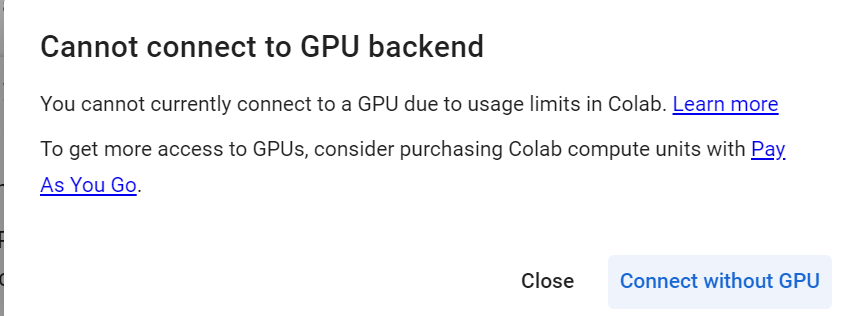

## **Installing and Importing Necessary Libraries**

In [1]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 776.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.2 MB/s eta 0:00:00


In [2]:
import pandas as pd                 # To manipulate and analyze data
import numpy as np

import matplotlib.pyplot as plt     # To visualize data
import seaborn as sns

import time                         # To used time-related functions
import json                         # To parse JSON data

pd.set_option("display.max_columns", None)        # Removes the limit for the number of displayed columns
pd.set_option("display.max_rows", 200)            # Sets the limit for the number of displayed rows

pd.set_option("display.float_format", lambda x: "%.3f" % x)  # Sets the display format for float values to 3 decimal places

# Import Library to provide informative messages to users without interrupting the flow of the program
# Warnings are typically used to alert users of potential problems,
# such as deprecated features or unexpected runtime conditions
import warnings
warnings.filterwarnings("ignore")

## **Loading the dataset**

In [3]:
# # uncomment and run the following code if Google Colab is being used and the dataset is in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the Data from excel into a dataset
folder = '/content/drive/MyDrive/AI_ML/Projects/Natural Language Processing - NLP/' # Path of the data files
stock_news_file = 'stock_news.csv'                                                  # Name of the Stock news file

stock_news = pd.read_csv(folder + stock_news_file)                                  # Reading the Stock news file
stock = stock_news.copy()                                                           # Copying the data to another variable to avoid any changes to original data

## **Data Overview**

### Understand the Shape of the Dataset

In [5]:
# Check the number of rows and columns in the Dataset Shape
print("There are", stock.shape[0], 'rows and', stock.shape[1], "columns.")

There are 349 rows and 8 columns.


### View the first and last 5 rows of the dataset

In [6]:
pd.concat([stock.head(), stock.tail()])       # returns the first and last 5 rows from dataset and display them together

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740,42.245,41.482,40.247,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740,42.245,41.482,40.247,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740,42.245,41.482,40.247,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740,42.245,41.482,40.247,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740,42.245,41.482,40.247,130672400,-1
344,2019-04-30,"Media mogul Oprah Winfrey, known for influenc...",50.765,50.850,49.778,48.709,186139600,-1
345,2019-04-30,"European shares fell on Tuesday, with banks u...",50.765,50.850,49.778,48.709,186139600,-1
346,2019-04-30,This article reports that the S&P 500 reached...,50.765,50.850,49.778,48.709,186139600,-1
347,2019-04-30,The Federal Reserve is anticipated to keep in...,50.765,50.850,49.778,48.709,186139600,-1
348,2019-04-30,"In the first quarter, South Korea's Samsung E...",50.765,50.850,49.778,48.709,186139600,0


### Understand the Data Types of the Dataset

In [7]:
stock.info()    # Print a concise summary of the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


In [8]:
stock['Date'] = pd.to_datetime(stock['Date'])  # Convert the 'Date' column to datetime format.

### Sanity Check of the Data

Check for duplicate values in the Dataset

In [9]:
# Check for duplicate values in the Dataset
stock.duplicated().sum() # aggregating the duplicate values of a dataset

0

Check presence of missing, NaN or negative value in the dataset

In [10]:
# Check presence of missing, NaN or negative value in the dataset
pd.DataFrame({
    'Missing_Counts': stock.isnull().sum(),                                   # Check for missing values in the Dataset
    'NaN_Counts': stock.isna().sum(),                                         # Check for NaN (Not an Number) values in the Dataset
    'Has_Negative': (stock.select_dtypes(include='number') < 0).any(),        # Check for negative values in the Dataset
})

,Missing_Counts,NaN_Counts,Has_Negative
Close,0,0,False
Date,0,0,NaN
High,0,0,False
Label,0,0,True
Low,0,0,False
News,0,0,NaN
Open,0,0,False
Volume,0,0,False


**Observations**: The Stock News is clean and complete, with no duplicate rows, missing values, or NaN (Not a Number) values. Additionally, all numerical values in the dataset are non-negative, but label where "Label" column, representing the sentiment polarity of the news content, is correctly categorized as follows:
 - 1 for positive sentiment,
 - 0 for neutral sentiment, and
 - -1 for negative sentiment.

### Statistical and Concise Summary

In [11]:
# Print statistical summary of the data of numerical columns using describe() method
stock.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,349,2019-02-16 16:05:30.085959936,2019-01-02 00:00:00,2019-01-14 00:00:00,2019-02-05 00:00:00,2019-03-22 00:00:00,2019-04-30 00:00:00,NaN
Open,349.000,46.229,37.568,41.740,45.975,50.708,66.817,6.443
High,349.000,46.700,37.818,42.245,46.025,50.850,67.062,6.507
Low,349.000,45.745,37.305,41.482,45.640,49.778,65.863,6.392
Close,349.000,44.926,36.254,40.247,44.597,49.111,64.805,6.398
Volume,349.000,128948236.103,45448000.000,103272000.000,115627200.000,151125200.000,244439200.000,43170314.919
Label,349.000,-0.054,-1.000,-1.000,0.000,0.000,1.000,0.715


In [12]:
# Print statistical summary of the object columns
stock.describe(include=["object"]).T

,count,unique,top,freq
News,349,349,"In the first quarter, South Korea's Samsung E...",1


**Based on Statistical Summary**:
 - **Date**: 349 records range from January 2, 2019, to April 30, 2019.
 - **News**: 349 unique News articles that could potentially affect the company's stock price
 - **Open**: Average opening price is 46.23, ranging from 37.57 to 66.82 with a standard deviation of 6.44.
 - **High**: Average high price is 46.70, with a range from 37.82 to 67.06 and a standard deviation of 6.51.
 - **Low**: Average low price is 45.75, ranging from 37.31 to 65.86, with a standard deviation of 6.39.
 - **Close**: Average closing price is 44.93, with a range from 36.25 to 64.81 and a standard deviation of 6.40.
 - **Volume**: Average volume is 128.95 million shares, ranging from 45.45 to 244.44 million, with a standard deviation of 43.17 million.
 - **Label**: Range from -1 (negative), 0 (netural) and 1 (positive)

## **Exploratory Data Analysis**

### Define Useful Functions for Improved Graphical Representations

#### Render a Boxplot and histogram combined

In [13]:
def histogram_boxplot(data, feature,
                      Title = None,
                      xlabel = None,
                      ylabel = None,
                      figsize = (12, 7), fontsize = 15,
                      kde = False,
                      bins = None,
                      boxPlot_Color = None,
                      histPlot_Color = None,
                      hist_palette = "winter",
                      stat_summary_loc = {'x':0.015, 'y':0.76}
                      ):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows = 2,          # Number of rows of the subplot grid= 2
        sharex = True,      # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize)

    # Create boxplot with mean indicator, and histogram with mean and median lines
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot( data = data, x = feature, ax = ax_box, showmeans = True, color = boxPlot_Color)  # For Boxplot
    sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist, bins = bins, color = histPlot_Color, palette = hist_palette
    ) if bins else sns.histplot(
        data = data, x = feature, color = histPlot_Color, kde = kde, ax = ax_hist
        )  # For histogram

    ax_hist.axvline(data[feature].mean(), color = "black", linestyle="--")   # Add mean to the histogram
    ax_hist.axvline(data[feature].median(), color = "black", linestyle="-")  # Add median to the histogram
    ax_hist.legend(['Mean', 'Median'])                                       # Add a legend with Mean and Median

    # Displaying summary statistics for the feature distribution
    text = f"Mean: {data[feature].mean():.2f}" + \
            "\nMedian: " + f"{data[feature].median():.2f}" + \
            "\nCount: " + f"{data[feature].count()}" + \
            "\nMax: " + f"{data[feature].max():.2f}" + \
            "\nMin: " + f"{data[feature].min():.2f}"
    ax_hist.text(stat_summary_loc['x'], stat_summary_loc['y'], text,
                 transform = ax_hist.transAxes,
                 bbox = dict(facecolor ='white',alpha = 0.3)
                 )

    # Set the Title of the Plot
    # If Title is Not Specified, then create the Title
    # Lambda Function Utilized
    Title = (("Distribution of " + feature) if Title is None else (Title)).replace("_", " ")

    # Assign a Suitable Title to the Plot
    fig.suptitle(Title, fontsize = fontsize, y = 0.95)

    # Set the label of the x column
    ax_hist.set_xlabel(((feature) if xlabel is None else (xlabel)).replace("_", " "),
               fontsize = fontsize)

    # Set the label of the y column
    if ylabel is not None: ax_hist.set_ylabel(ylabel.replace("_", " "), fontsize=fontsize)

    plt.show()  # show the plot

#### Render a labeled Barplot

In [14]:
# function to create labeled barplots
def labeled_barplot(data,             # dataframe
                    feature,          # dataframe column name
                    hue = None,       # second dataframe column name
                    mapping = {},     # if column represent binary value then map to the actual value
                    perc = False,     # whether to display percentages instead of count (default is False)
                    n = None,         # displays the top n category levels (default is None, i.e., display all levels)
                    Title = None,
                    xlabel = None,
                    palette = "Paired",
                    fontsize = 12, degree = 0):

    # Handling NaN values
    data[feature] = data[feature].fillna("Missing")

    # Apply the mapping to the feature column if a mapping dictionary is provided
    if mapping:
        data[feature] = data[feature].map(mapping)

    hue_count = 0 if hue == None else data[hue].nunique() # number of unique values in the hue column
    count = data[feature].nunique() + hue_count           # number of unique values
    total = len(data[feature])                            # length of the column

    # Set the Plot size
    plt.figure(figsize = (count + 1, 5)) if n is None else plt.figure(figsize = (n + 1, 5))

    # Generate the Plot
    ax = sns.countplot(data = data, x = feature, hue = hue, palette = palette,
        order = data[feature].value_counts().index[:n].sort_values(),
    )
    # For each bar: Place a label
    ax = annotate_the_labels(ax, total, perc = perc)

    # Render the barplot
    plot_styling(data, feature, mapping,
                 Title, "Barplot of ",
                 xlabel, degree = degree,
                 )

    sns.despine(left=True)    # Hide the plot border
    plt.show()                # show the plot

In [15]:
def annotate_the_labels(ax, col, fontsize = 12, perc = True):
  for p in ax.patches:
    # Set the Label
    label = "{:.1f}%".format(100 * p.get_height() / col) if perc else p.get_height()

    # Get the x and y position of the label
    x = p.get_x() + p.get_width() / 2   # width of the plot
    y = p.get_height()                  # height of the plot

    # Annotate the Labels
    ax.annotate(label, (x, y), ha = "center", va = "center",
      size = fontsize, xytext = (0, 5), textcoords="offset points",
      )  # annotate the percentage

  return ax

#### Other Useful Functions

In [16]:
def plot_styling (  data,
                    feature,
                    mapping = {},
                    Title = None,
                    Title_prefix = "",
                    xlabel = None,
                    fontsize = 12, degree = 0,
                    ):
    # If Title is Not Specified, Set the Title of the Plot
    Title = (Title_prefix + " " + (feature.replace("_", " "))) if Title is None else Title

    # Add the Title to the Plot
    plt.title(Title, fontsize = fontsize, y=1.02)

    # if x Axis label is not specified, then
    # Set the x axis label by replacing Underscores in the Column Name with Spaces
    plt.xlabel(((feature.replace("_", " ")) if xlabel is None else xlabel),
               fontsize = fontsize)

    # map the xticks label
    labels = [mapping.get(x, x) for x in np.sort(data[feature].unique())]

    # Set the xticks labels
    plt.xticks(tuple(range(0, len(labels))),
               labels = labels,
               rotation = degree, fontsize = fontsize # Rotate the x-Axis Label and set the front side
               )

### Univariate Analysis

#### Observations on Label

* Distribution of individual variables
* Compute and check the distribution of the length of news content

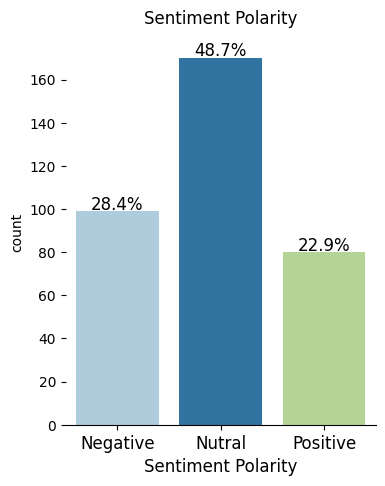

In [17]:
# Mapping the Gender Labels
mapping_label = {1: "Positive", 0: "Nutral", -1: "Negative"}

# Call the Function with Display The labeled barplot
labeled_barplot(stock.copy(), "Label", perc = True,
                mapping = mapping_label,
                xlabel = "Sentiment Polarity",
                Title = "Sentiment Polarity")

**Observation**: he distribution of sentiment polarity across three categories: Negative, Neutral, and Positive indicates that nearly half of the news content is neutral, while the remaining content shows a significant presence of both negative and positive sentiments, though in smaller proportions.

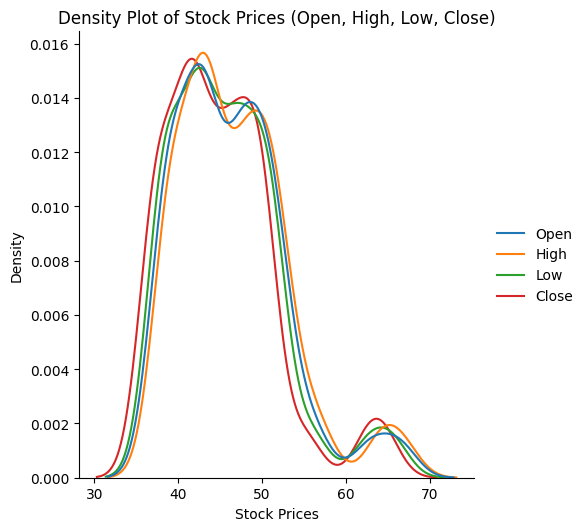

In [18]:
sns.displot(data = stock[['Open', 'High', 'Low', 'Close']], kind="kde", palette="tab10")

plt.xlabel('Stock Prices')                                            # Add xlabel and legend caption
plt.title('Density Plot of Stock Prices (Open, High, Low, Close)')    # Add title and legend caption

plt.show()                                                            # Display the plot

**Observation**: The density plot shows the distribution of stock prices for the Open, High, Low, and Close values. Here are key observations:
- **Price Range**: The stock prices across all categories (Open, High, Low, Close) range from approximately 30 to 70.
- **Central Distribution**: Most stock prices are concentrated between 40 and 50, as indicated by the peak in the density curve. This suggests that the majority of the stock prices during this period were within this range.
- **Similar Distribution**: The curves for the four price types (Open, High, Low, Close) are closely aligned, suggesting that the differences between these prices on any given day are relatively small.
- **Secondary Peaks**: There is a slight secondary peak around 60, indicating that there were also a smaller cluster of stock prices in that range.

Overall, this plot suggests that the stock prices for Open, High, Low, and Close are very closely related, with minor variations, and most prices are concentrated in the 40-50 range.

#### Observations on Volume

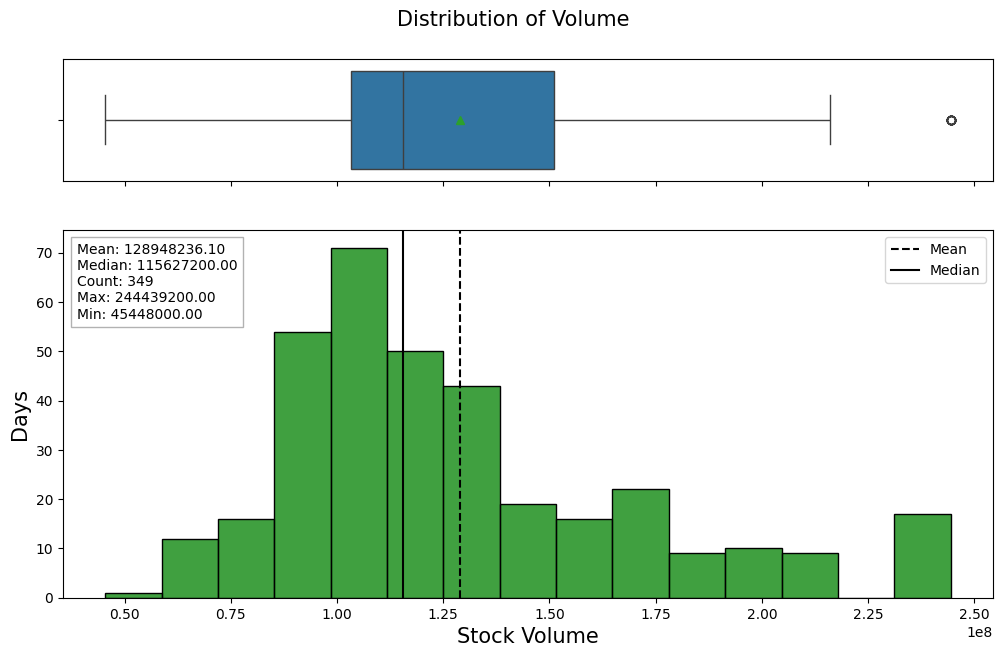

In [19]:
histogram_boxplot(stock, 'Volume',
                      xlabel = "Stock Volume",
                      ylabel= 'Days',
                      kde = False,
                      histPlot_Color = "Green",
                      )

**Observatios**:
- The distribution of trading volume is right-skewed, with most trading days experiencing volumes between 100 to 150 million shares.
- The mean volume (\~128.95 million) is higher than the median (\~115.63 million), indicating a few days with higher-than-usual trading volumes.
- There is an outlier around 225 million shares, which contributes to the skewness and pulls the mean upward.
- The majority of the trading days exhibit moderate volume, with only a small number of days experiencing significantly higher activity.

#### Observations on News length

In [20]:
# Calculating the total number of words present in the news content.
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))

# Print the statistical summary for the news content length
stock['news_len'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
news_len,349.000,49.312,5.728,19.000,46.000,50.000,53.000,61.000


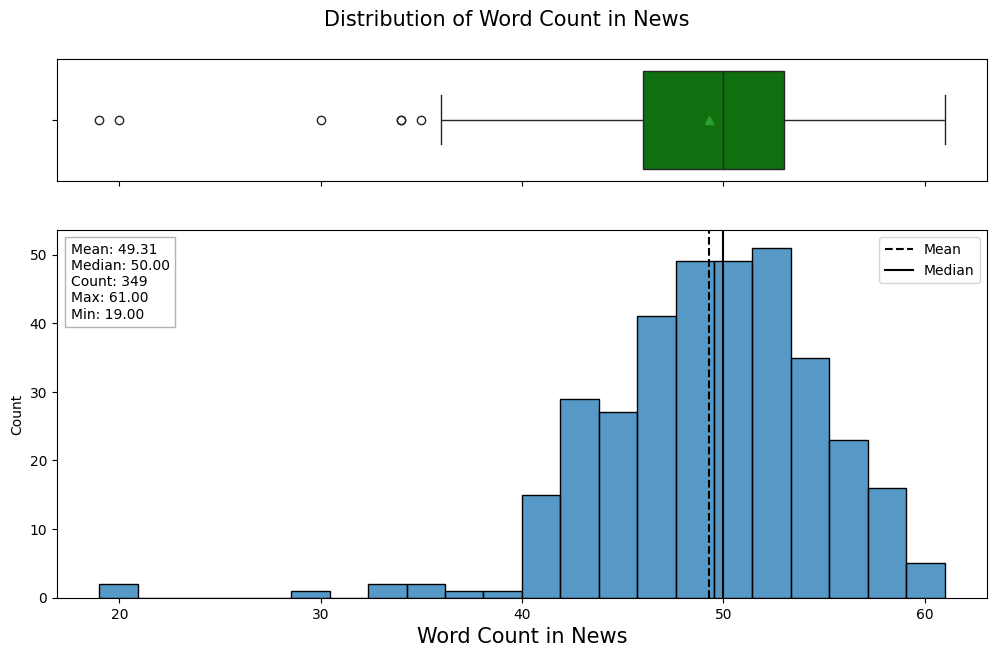

In [21]:
histogram_boxplot(stock, 'news_len',
                      Title = "Distribution of Word Count in News",
                      xlabel = "Word Count in News",
                      kde = False,
                      boxPlot_Color = 'Green',
                      )

**Observations**: Following are key observations from the distribution of word count in the news content:
- **Word Count Range**: The word count of the news articles ranges from a minimum of 19 words to a maximum of 61 words.
- **Mean and Median**: The mean word count is approximately 49.31, and the median is 50 words, indicating that the distribution is fairly symmetric around this central value.
- **Distribution Shape**: The histogram shows a normal-like distribution of word counts, with the highest frequency around the 50-word mark, and tapering off towards both extremes (fewer articles with very low or very high word counts).
- **Outliers**: The box plot highlights a few outliers on the lower end, with some news articles having significantly fewer words (around 19-30 words).

Overall, the news content in this dataset typically consists of around 50 words, with a few outliers on the lower end.

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

#### Correlation Check

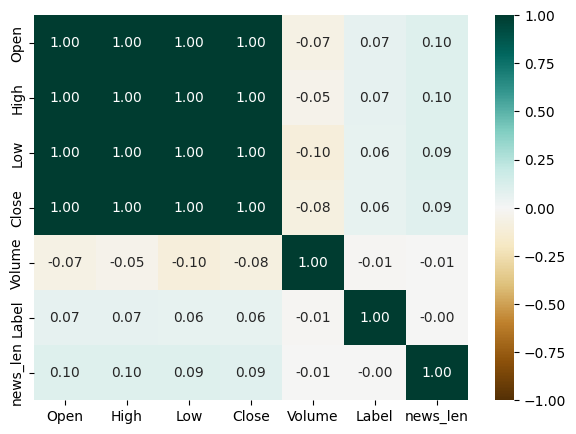

In [22]:
# Assess the correlation among all Numerical columns

plt.figure(figsize=(7, 5))                                       # Set the figure size
correlation_matrix = (stock.select_dtypes(include=['number']))    # Select only numerical columns and create a correlation matrix

                                                                  # Plot the heatmap using Seaborn
heatmap = sns.heatmap(correlation_matrix.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="BrBG")
plt.show()                                                        # Display the Plot

**Observations**: Below are key observations from the correlation heatmap:
- **Strong Correlation among Price Columns**: There is a perfect positive correlation (1.00) between the Open, High, Low, and Close prices. This indicates that these price metrics move together and are highly interdependent.
- **Volume**: Shows almost no correlation with price-related variables, Label, or news_len, with values between -0.08 and 0.07, indicating no significant linear relationship with stock prices or sentiment.
- **Label (Sentiment Polarity)**: Has negligible correlation with price metrics and volume, showing no direct impact of news sentiment on stock prices.

#### Label vs Price (Open, High, Low, Close)

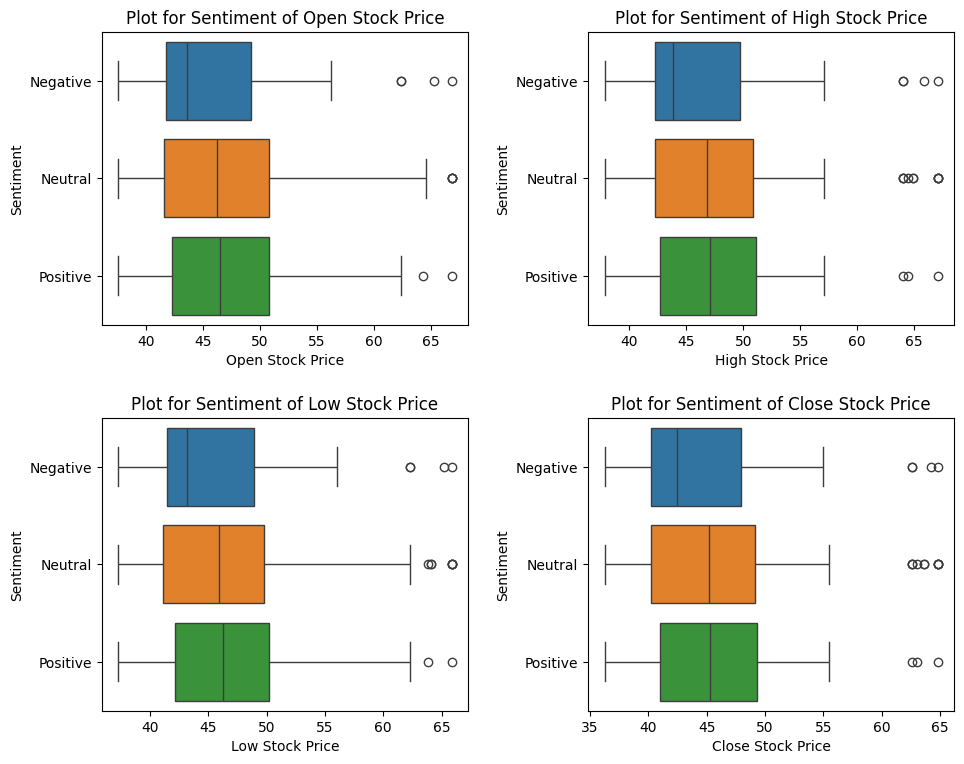

In [23]:
# Create a temporary column with mapped labels
label_mapping = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
temp_stock = stock.copy()
temp_stock['Sentiment'] = temp_stock['Label'].replace(label_mapping)

plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=temp_stock, y="Sentiment", x=variable, hue="Sentiment", orient="h", dodge=False)
    plt.title(f'Plot for Sentiment of {variable} Stock Price')
    plt.xlabel(f'{variable} Stock Price')
    plt.tight_layout(pad=2)

plt.show()

**Observations**:
 - The boxplots show that there is minimal variation in stock prices across sentiment categories (Positive, Neutral, Negative). The median values for Open, High, Low, and Close prices remain consistent, regardless of sentiment.
 - Therer are presence of outliers across all sentiment categories. These outliers suggest that there were some instances where stock prices deviated significantly from the typical range, but the overall distribution remains similar across sentiments.

#### Label vs Volume

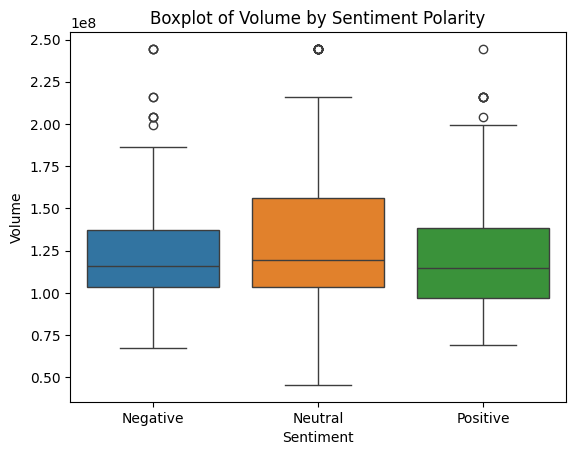

In [24]:
# Plot with hue and title
sns.boxplot( data=temp_stock, x="Sentiment", y="Volume", hue="Sentiment")
# Add a Plot Title
plt.title('Boxplot of Volume by Sentiment Polarity')

plt.show()        # Display the plot

**Observation**: Following is the distribution of Volume across the three Sentiment categories:
- **Neutral Sentiment** has the highest variability in volume and the highest median.
- **Negative Sentiment** exhibits the lowest median volume and the smallest range.
- **Positive Sentiment** has a similar median to Neutral but with less variability.

Outliers are present in all categories, indicating occasional spikes in volume, especially in Positive and Negative sentiments.

In summary, Neutral sentiment is associated with higher and more variable trading volumes, while Negative sentiment has the least.

#### Date vs Price (Open, High, Low, Close)

In [25]:
stock_daily = stock.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

# Set 'Date' as index and show the first few rows
stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740,42.245,41.482,40.247,130672400.000
2019-01-03,43.570,43.787,43.223,42.471,103544800.000
2019-01-04,47.910,47.920,47.095,46.420,111448000.000
2019-01-07,50.792,51.123,50.162,49.111,109012000.000
2019-01-08,53.475,54.508,51.685,50.787,216071600.000


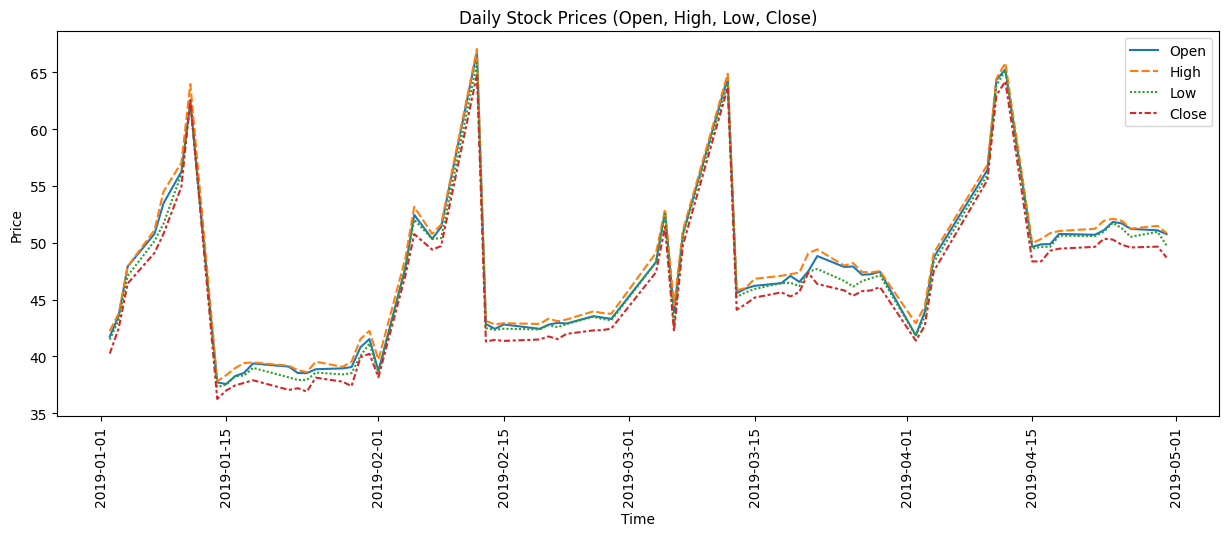

In [26]:
plt.figure(figsize=(15, 5))

# Plot all variables except 'Volume'
sns.lineplot(data=stock_daily.drop("Volume", axis=1))

plt.title('Daily Stock Prices (Open, High, Low, Close)')
plt.xlabel('Time', )
plt.ylabel('Price')
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()

**Observations**:
- **General Trend**: The stock prices (Open, High, Low, Close) follow a similar pattern, indicating consistency between these price metrics on any given day.
- **Volatility**: There are multiple spikes and dips in the prices, notably around mid-January, early February, mid-March, and mid-April. These represent periods of high volatility with significant price fluctuations.
- **Price Drops**: There are a few sharp drops, particularly noticeable around January 8, February 8, March 12, and April 12, where all price metrics drop simultaneously before stabilizing again.
- **Consistent Gap**: The gap between the High and Low prices remains relatively consistent, with High prices generally being the highest, followed by Open, Close, and then Low prices.

In summary, the plot demonstrates a clear relationship between the four price variables and highlights periods of volatility and stability over time.

#### Volume vs Price

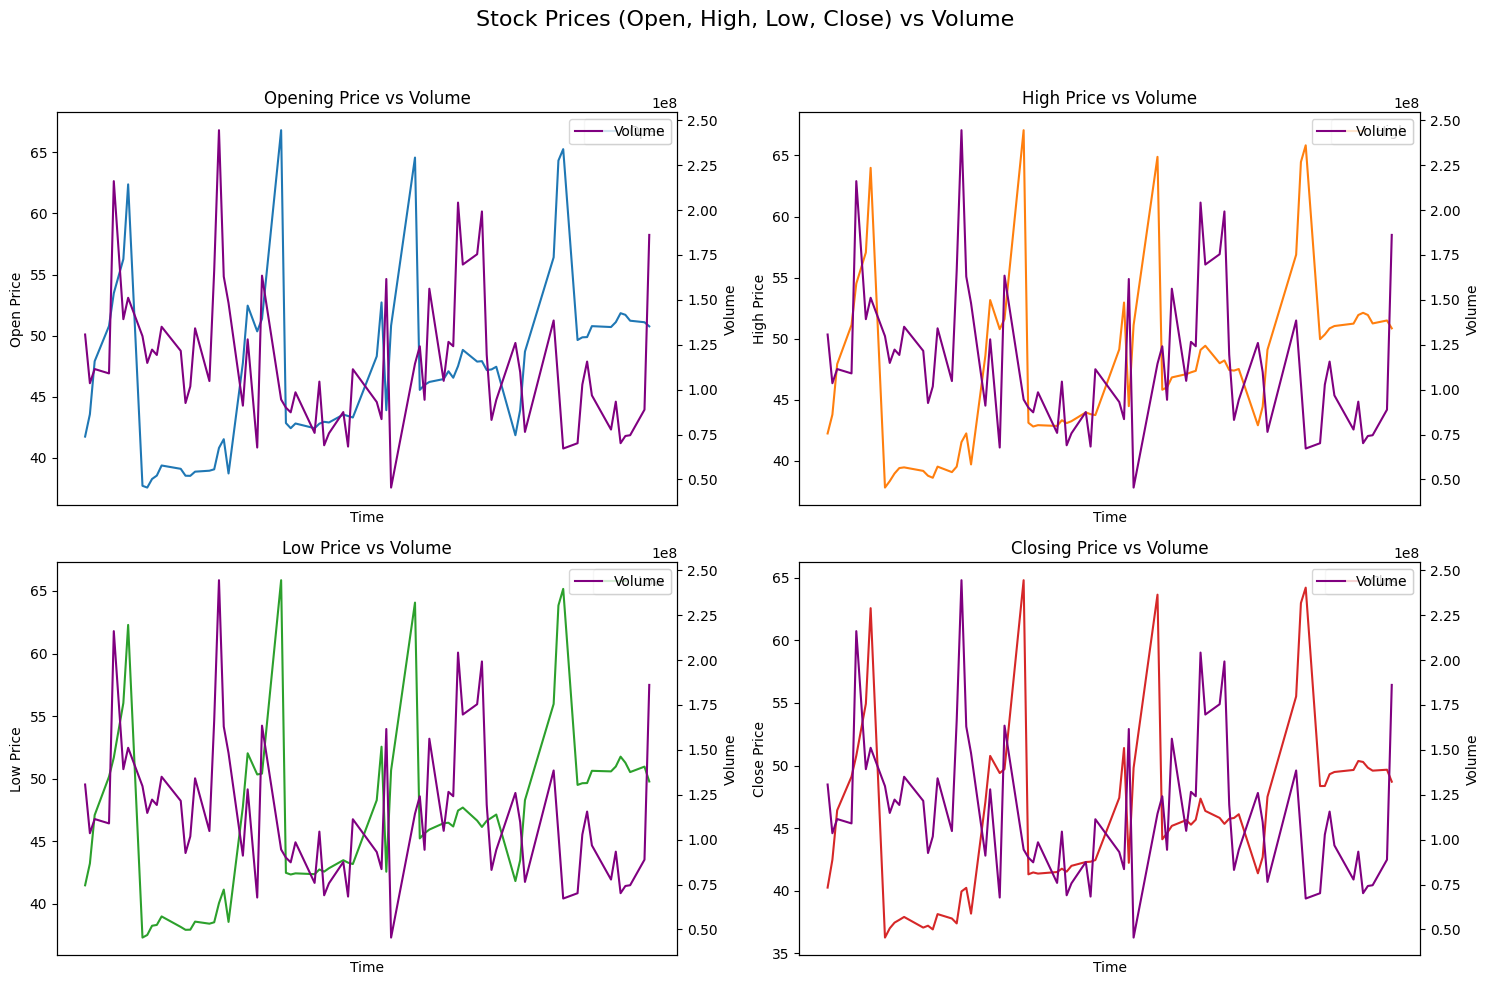

In [27]:
# Set up the figure and axes for 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Titles for each subplot
titles = ['Opening Price vs Volume',
          'High Price vs Volume',
          'Low Price vs Volume',
          'Closing Price vs Volume']

# Get a dynamic color palette
palette = sns.color_palette("tab10", 4)  # Using a palette with 4 distinct colors

# Plot for each price metric (Open, High, Low, Close) with Volume
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    ax1 = axes[i]

    # Plot Price (Open, High, Low, Close)
    ax1.set_xlabel('Time')
    ax1.set_ylabel(f'{col} Price')
    sns.lineplot(data=stock_daily[col], ax=ax1, label=col, color=palette[i])

    # Create a secondary y-axis for Volume
    ax2 = ax1.twinx()
    ax2.set_ylabel('Volume')
    sns.lineplot(data=stock_daily['Volume'], ax=ax2, label='Volume', color='purple')

    ax1.set_title(titles[i])    # Set the title for each subplot

    ax1.set_xticks([])          # Remove x-axis ticks for each subplot
    ax2.set_xticks([])          # Remove x-axis ticks for each subplot

# Set the main title for the entire figure
fig.suptitle('Stock Prices (Open, High, Low, Close) vs Volume', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])    # Adjust layout for better fit
plt.show()                                # Display the plot

**Observations**:
- **Correlation between Volume and Prices**: There is no clear and consistent correlation between Volume and stock prices (Open, High, Low, Close). The patterns for volume and price often do not move in sync, indicating that higher trading volume does not necessarily correspond to higher or lower prices.
- **Volatility**: All price variables (Open, High, Low, Close) show significant volatility over time, with frequent spikes and dips.
- **Volume Spikes**: There are several distinct spikes in Volume. These spikes in trading activity do not always correspond with price increases or decreases, implying that trading volume alone does not determine stock price movements.
- **Similar Trends across Price Metrics**: The Open, High, Low, and Close prices follow very similar trends, with the prices fluctuating in tandem, maintaining close proximity in value.

In summary, the plots suggest that while price and volume data are both volatile, they do not exhibit a strong direct relationship in this dataset, with volume spikes occurring at various points without consistently affecting the price variables.

## **Data Preprocessing**

In [28]:
stock["Date"].describe()

,Date
count,349
mean,2019-02-16 16:05:30.085959936
min,2019-01-02 00:00:00
25%,2019-01-14 00:00:00
50%,2019-02-05 00:00:00
75%,2019-03-22 00:00:00
max,2019-04-30 00:00:00


### Split the Data in Train, Test and Validation Set

The data was split by date range to ensure that the model is trained and validated on data from different time periods, preventing any data leakage. This approach is common in time-series data, where future data should not be used to train or validate the model, as it would lead to overly optimistic results and unrealistic performance in real-world applications. Splitting by date range mimics the real-world scenario where we only use past data to predict future outcomes.

In [29]:
# Split the data based on date ranges
X_train = stock[(stock['Date'] < '2019-04-01')].reset_index()                                    # Select all rows where the 'Date' is before '2019-04-01'
X_val = stock[(stock['Date'] >= '2019-04-01') & (stock['Date'] < '2019-04-16')].reset_index()    # Select all rows where the 'Date' is from '2019-04-01' to '2019-04-16' (excluded)
X_test = stock[stock['Date'] >= '2019-04-16'].reset_index()                                      # Select all rows where the 'Date' is from '2019-04-16' till the end.

# Pick the 'Label' column as the target variable
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

In [30]:
# Print the shapes of the datasets
print("Train data shape", X_train.shape)
print("Validation data shape", X_val.shape)
print("Test data shape ", X_test.shape)
print("\n")
print("Train label shape", y_train.shape)
print("Validation label shape", y_val.shape)
print("Test label shape ", y_test.shape)

Train data shape (286, 10)
Validation data shape (21, 10)
Test data shape  (42, 10)


Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


## **Word Embeddings**

### Define Useful Classes & Functions

In [31]:
import random # For generating random words from the vocabulary

# Returns n random words from the vocabulary of the Word2Vec model.
def get_random_words(vectorizer, n = 2):
    # Parameters:
    # vectorizer (Word2VecVectorizer): The Word2VecVectorizer instance.
    # n (int): Number of random words to return.
    # Returns: list: A list of randomly selected words.
    vocab = list(vectorizer.vocab)
    return random.sample(vocab, n)

In [32]:
# Print shapes of the datasets in a meaningful way
def print_data_shapes(X_train_wv, X_val_wv, X_test_wv):
    print(f"Training Data Shape: {X_train_wv.shape[0]} samples, {X_train_wv.shape[1]} features")
    print(f"Validation Data Shape: {X_val_wv.shape[0]} samples, {X_val_wv.shape[1]} features")
    print(f"Test Data Shape: {X_test_wv.shape[0]} samples, {X_test_wv.shape[1]} features")

**BaseVectorizer class to handle common functionalities for both GloVe and Word2Vec**

In [33]:
class BaseVectorizer:
    def __init__(self, vector_size):
        self.vector_size = vector_size
        self.vocab = set()
        self.word_vector_dict = {}

    #  Vectorizes a single sentence by averaging the word vectors of the words present in the model's vocabulary
    def vectorize_sentence(self, sentence):
        # Parameters: sentence (str): The input sentence to be vectorized
        # Returns: np.array: The averaged vector representation of the sentence

        feature_vector = np.zeros((self.vector_size,), dtype="float64")
        words_in_vocab = [word for word in sentence.split() if word in self.vocab]

        for word in words_in_vocab:
            feature_vector += np.array(self.word_vector_dict[word])

        if len(words_in_vocab) > 0:
            feature_vector /= len(words_in_vocab)

        return feature_vector

    # Vectorizes an entire corpus of text (e.g., a dataframe column)
    def vectorize_corpus(self, corpus):
        # Parameters: corpus (pd.Series): The corpus of text to vectorize
        # Returns: pd.DataFrame: A dataframe where each row is the vectorized representation of a document

        return pd.DataFrame(corpus.apply(self.vectorize_sentence).tolist(),
                            columns=[f'Feature_{i}' for i in range(self.vector_size)])

    def get_vocabulary_size(self):      # Method to get the vocabulary size
        return len(self.vocab)

    # Abstract method for getting word embeddings (specific to each model)
    def get_word_embedding(self, word):
        raise NotImplementedError("This method should be implemented by the derived class")

### Word2Vec

Word2Vec is a method to convert words into meaningful numerical representations that reflect the context of the words in the data, enabling machines to better understand and process human language.

**Initialize the Word2VecVectorizer class**

In [34]:
from gensim.models import Word2Vec

# Initilize the Word2VecVectorizer class that inherits from BaseVectorizer
class Word2VecVectorizer(BaseVectorizer):
    def __init__(self, data, vector_size=300, window=5, min_count=1, workers=6):
        # Parameters:
        # - data (pd.Series): The text data to be used for training the Word2Vec model.
        # - vector_size (int): Dimensionality of the word vectors.
        # - window (int): Maximum distance between the current and predicted word.
        # - min_count (int): Ignores all words with total frequency lower than this.
        # - workers (int): Number of CPU cores to use for training.

        # Call the constructor of the parent class (BaseVectorizer) to initialize common attributes
        super().__init__(vector_size)
        self.words_list = [item.split(" ") for item in data.values]
        self.model = Word2Vec(self.words_list, vector_size=vector_size, window=window,
                              min_count=min_count, workers=workers)
        self.word_vector_dict = self._build_word_vector_dict()
        self.vocab = set(self.word_vector_dict.keys())

    # Method to build a dictionary of words and their corresponding vectors
    def _build_word_vector_dict(self):
        words = list(self.model.wv.key_to_index.keys())
        wvs = self.model.wv[words].tolist()
        return dict(zip(words, wvs))

    # Method to retrieve word embeddings for a specific word (specific to Word2Vec)
    def get_word_embedding(self, word):
        if word in self.vocab:
            return self.model.wv[word]
        else:
            raise ValueError(f"'{word}' not in vocabulary")

**Word2Vec Model Initialization, Vocabulary Exploration, and Vectorization of Text Data**

In [35]:
Word2Vec_vectorizer = Word2VecVectorizer(stock['News'], vector_size = 300)   # Initialize Word2VecVectorizer

In [36]:
print("Vocabulary size:", Word2Vec_vectorizer.get_vocabulary_size())         # Get vocabulary size

Vocabulary size: 4682


In [37]:
random_words = get_random_words(Word2Vec_vectorizer, n = 2)                  # Get 2 random words from the vocabulary

for word in random_words:                                           # Print their word embeddings
    print(f"Embedding for '{word}':\n", Word2Vec_vectorizer.get_word_embedding(word))

Embedding for 'removed':
 [ 4.2773005e-05  2.5771153e-03 -4.8172456e-04  3.1219970e-03
  1.7311794e-04 -4.5303014e-04 -9.8335433e-05  9.2290286e-03
 -2.0582122e-03  9.0782082e-04 -1.2028149e-03 -4.8700895e-04
 -2.2746637e-03 -2.1898258e-03 -3.7921690e-03 -2.4569794e-03
  4.6526454e-03 -1.3606834e-03  3.6396238e-03 -2.4774342e-03
 -4.1726470e-04  1.7883497e-03  4.1376599e-03  2.2479638e-03
  2.5962896e-03 -4.6198801e-04 -5.3987894e-03 -6.5744022e-04
 -4.2127324e-03 -1.4891335e-03  2.3645554e-03 -3.0369074e-03
  3.2968170e-03  9.1334921e-04  1.9496265e-03  1.1330713e-03
  1.1125759e-03  2.2431856e-04  2.8682265e-03 -1.3581661e-03
  1.2336500e-03  3.2286656e-03  2.4835599e-04  1.1479290e-04
 -1.1859062e-03  4.1399800e-04 -1.2216690e-03 -1.0598012e-03
  1.1029537e-03  3.5103965e-03 -1.9159969e-03  2.8680565e-03
 -2.3935416e-03  3.9098389e-03 -1.2559192e-03 -6.2544254e-04
 -6.4183242e-04  8.1167842e-04  7.7432266e-04  7.1683247e-04
  2.2433784e-03 -3.6406840e-04 -2.8323618e-04  2.5703150e-0

In [38]:
# Vectorize the training, validation, and test sets
start = time.time()

X_train_wv = Word2Vec_vectorizer.vectorize_corpus(X_train['News'])
X_val_wv = Word2Vec_vectorizer.vectorize_corpus(X_val['News'])
X_test_wv = Word2Vec_vectorizer.vectorize_corpus(X_test['News'])

end = time.time()
print('Time taken:', (end - start))

Time taken: 0.5246961116790771


In [39]:
# Print the shape of the Vectorize training, validation, and test sets
print_data_shapes(X_train_wv, X_val_wv, X_test_wv)

Training Data Shape: 286 samples, 300 features
Validation Data Shape: 21 samples, 300 features
Test Data Shape: 42 samples, 300 features


**Observation**: Each news content has been converted to a 300-dimensional vector using the Word2Vec model. The vector representation captures the context and relationships between the words in the news article based on the Word2Vec model's learned word embeddings.

### GloVe

GloVe is a word embedding technique that uses global word co-occurrence statistics to capture semantic relationships between words. It is widely used in natural language processing tasks due to its ability to generate meaningful word vectors that reflect both syntactic and semantic similarities.

**Initialize the GloVeVectorizer class by loading the pre-trained GloVe model**

In [40]:
from gensim.models import KeyedVectors  # For loading the pre-trained GloVe model

# Initialize the GloVeVectorizer class that inherits from BaseVectorizer
class GloVeVectorizer(BaseVectorizer):
    def __init__(self, glove_model_path, vector_size=100):
        # Parameters:
        # - glove_model_path (str): The path to the GloVe model in Word2Vec format
        # - vector_size (int): Dimensionality of the word vectors

        super().__init__(vector_size)
        self.model = KeyedVectors.load_word2vec_format(glove_model_path, binary=False)
        self.vocab = set(self.model.index_to_key)
        self.word_vector_dict = self._build_word_vector_dict()

    # Method to build a dictionary of words and their corresponding vectors
    def _build_word_vector_dict(self):
        return dict(zip(self.model.index_to_key, list(self.model.vectors)))

    # Method to retrieve word embeddings for a specific word (specific to GloVe)
    def get_word_embedding(self, word):
        if word in self.vocab:
            return self.model[word]
        else:
            raise ValueError(f"'{word}' not in vocabulary")

**GloVe Model Initialization, Vocabulary Exploration, and Vectorization of Text Data**

In [41]:
glove_model_path = 'glove.6B.100d.txt.word2vec' # Path to the GloVe model

# Initialize GloVeVectorizer
glove_vectorizer = GloVeVectorizer(folder + glove_model_path, vector_size = 100)

In [42]:
print("Vocabulary size:", glove_vectorizer.get_vocabulary_size())         # Get vocabulary size

Vocabulary size: 400000


In [43]:
random_words = get_random_words(glove_vectorizer, n = 2)                  # Get 2 random words from the vocabulary

for word in random_words:                                                 # Print their word embeddings
    print(f"Embedding for '{word}':\n", glove_vectorizer.get_word_embedding(word))

Embedding for 'fufeng':
 [ 0.17452   -0.42316   -0.1325     0.37221    0.65107    0.50082
  0.073803   0.086822   0.072528   0.11396    0.013831  -0.10765
 -0.19296    0.15941   -0.30385    0.044031  -0.019578   0.32653
  0.31125    0.028908  -0.25068    0.080614  -0.087911  -0.026283
 -0.66563   -0.14334    0.11084    0.77186   -0.27244    0.20823
 -0.19546   -0.20853    0.45314   -0.37284    0.092045  -0.027619
  0.36973    0.10126    0.40676   -0.14532   -0.24922    0.26029
 -0.31997   -0.33984   -0.17172   -0.11227    0.59792    0.4328
  0.22342   -0.049911   0.20194    0.19649    0.039528  -0.88824
  0.22922    0.52096    0.08759   -0.21072   -0.46834   -0.46642
  0.12219   -0.33027    0.30774    0.47257   -0.42822    0.16245
 -0.19469    0.10695   -0.60827   -0.0047769 -0.14341    0.033721
 -0.43003    0.29188   -0.1765    -0.1449     0.20195   -0.38103
  0.84906    0.36789   -0.86157    0.50912    0.024542  -0.21534
  0.70831    0.22735   -0.17499   -0.022555   0.20372    0.1990

In [44]:
# Vectorize the training, validation, and test sets
start = time.time()

X_train_gl = glove_vectorizer.vectorize_corpus(X_train['News'])  # Applying GloVe on 'News' column
X_val_gl = glove_vectorizer.vectorize_corpus(X_val['News'])      # Applying GloVe on 'News' column
X_test_gl = glove_vectorizer.vectorize_corpus(X_test['News'])    # Applying GloVe on 'News' column

end = time.time()
print('Time taken:', (end - start))

Time taken: 0.11623644828796387


In [45]:
# Print the shape of the Vectorize training, validation, and test sets
print_data_shapes(X_train_gl, X_val_gl, X_test_gl)

Training Data Shape: 286 samples, 100 features
Validation Data Shape: 21 samples, 100 features
Test Data Shape: 42 samples, 100 features


**Observation**: Each news content has been converted to a 100-dimensional vector using the pre-trained GloVe model. This vector representation is derived from the GloVe word embeddings, capturing global word co-occurrence statistics and semantic relationships within the text.

### Sentence Transformer

In [46]:
# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [47]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [48]:
# encoding the dataset
start = time.time()

# Apply Sentence Transformer on 'News' column
X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device=device)
X_val_st = model.encode(X_val["News"].values, show_progress_bar=True, device=device)
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device=device)

end = time.time()
print("Time taken:", (end - start))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken: 2.9671270847320557


In [49]:
# Print the shape of the Vectorize training, validation, and test sets
print_data_shapes(X_train_st, X_val_st, X_test_st)

Training Data Shape: 286 samples, 384 features
Validation Data Shape: 21 samples, 384 features
Test Data Shape: 42 samples, 384 features


**Observation**: Each news content has been converted to a 384-dimensional vector.

## **Sentiment Analysis**

### Define useful Functions

#### Plot a confusion Matrix

In [50]:
# To build, tune, and evaluate ML models
from sklearn.ensemble import GradientBoostingClassifier

sentiment_label = ["Nutral", "Positive", "Negative"]  # Define the labels for the confusion matrix
model_classifier = GradientBoostingClassifier         # Define the model class

cm_model_titles = [
    'Confusion Matrix on Training Dataset',
    'Confusion Matrix on Validation Dataset'
    ]  # Titles for the confusion matrices

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Function to create subplots and call the confusion_matrix_sklearn function multiple times
def plot_confusion_matrices_side_by_side(model, predictors, targets, label_list, caption = None, titles = None, figsize = (5, 4)):

    num_matrices = len(predictors)  # Number of confusion matrices to plot

    # create subplots with 1 row and num_matrices columns
    fig, axes = plt.subplots(1, num_matrices, figsize = figsize)
    cm_data = []

    # Loop through each subplot and plot the confusion matrix
    for i in range(num_matrices):
        plt.sca(axes[i])  # set current axis to the i-th subplot

        # call the confusion_matrix_sklearn function
        confusion_matrix_sklearn(model, predictors[i], targets[i], label_list, titles[i], figsize = figsize)

    fig.suptitle('Confusion Matrix' if caption == None else caption)  # set the title of the entire figure
    plt.tight_layout()
    plt.show()

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Plot a confusion matrix to visualize the performance of a classification model.
def confusion_matrix_sklearn(model, predictor, target, label_list, title = None, figsize = (5, 4)):
    # Parameters:
    # actual (array-like): The true labels
    # predicted (array-like): The predicted labels from the model
    # label_list (list): A list of labels for the confusion matrix
    # title (text): Title of the Confusion Matrix
    # figsize: Size of the confusion matrix

    # Returns: The confusion matrix plot

    pred = model.predict(predictor)      # Make predictions using the classifier
    cm = confusion_matrix(target, pred)   # Compute the confusion matrix
    #plt.figure(figsize = figsize)                   # Create a new figure with a specified size.

    # Plot the confusion matrix using a heatmap with annotations and specified colors
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels = label_list, yticklabels = label_list)

    plt.ylabel('Actual')                                      # Label for the y-axis
    plt.xlabel('Predicted')                                   # Label for the x-axis
    plt.title('Confusion Matrix' if title == None else title) # Title of the plot

    return plt  # return the plot

#### Model Performance Computation

In [53]:
# Compute various performance metrics for a classification model using sklearn
def model_performance_classification_sklearn(model, predictors, target, set = None, Title = None):
    # Parameters:
    # model (sklearn classifier): The classification model to evaluate
    # predictors (array-like): The independent variables used for predictions
    # target (array-like): The true labels for the dependent variable
    # Returns: pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score)

    pred = model.predict(predictors)  # Make predictions using the classifier.

    accuracy = accuracy_score(target, pred)                       # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')       # to compute Recall
    precision = precision_score(target, pred, average='weighted') # to compute Precision
    f1 = f1_score(target, pred, average='weighted')               # to compute F1-score
    errors = abs(pd.to_numeric(target) - pred)                    # to compute errors

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": accuracy,
         "Recall": recall,
         "Precision": precision,
         "F1 Score": f1,
         "Error (degree)" : [(np.mean(errors)).round(4)],
         },
        index=[0] if Title == None else [Title],
    )

    df_perf.index.name = 'Model'                        # Set the index name to 'Model'
    if set is not None: df_perf.insert(0, "Set", set)   # Conditionally add 'Set' column after the DataFrame is created

    return df_perf  # return the dataframe

In [54]:
# Function to visualize the performance of Training and Validation Set for Models
def Visualize_Perf_compariason(data ,perf,
                               kind = "bar",
                               title = None,
                               xlabel = None,
                               fontsize = 10,
                               width = 6,degree = 0,
                               legend_pos = None):
  ncols = len(perf)  # Number of columns to display
  spines_pos = ['top', 'right','left']  # Set the spines to be visible

  # Create a figure and axes object
  fig, axes = plt.subplots(ncols = ncols, figsize = (width*ncols,6))
  xlabel = "Model" if xlabel is None else xlabel   # set xLabel

  # Loop through each column in the DataFrame
  for i, column in enumerate(perf):
    # Set y-axis limits based on the lowest value of Recall
    lower = (np.min(data[column]) - 0.025)  # Set the lower boundary of ylim
    upper = (np.max(data[column]) + 0.05)   # Set the upper boundary of ylim

    # Plot the bar chart for the current column
    data[column].plot(kind = kind, ax = axes[i])        # Plot the bar chart for the current column
    title = f"Compare the {column} of Training vs Validation sets" if title is None else title      # set title

    axes[i].set_title(title)                            # Set the title of the plot
    axes[i].set_xlabel(xlabel, fontsize = fontsize)                          # Set the x-axis label
    axes[i].set_ylabel(column, fontsize = fontsize)                          # Set the y-axis label
    axes[i].set_ylim(lower, upper)                      # Set the y-axis limits
    axes[i].legend(fontsize='small')
    axes[i].legend(fontsize='small', bbox_to_anchor = legend_pos)
                                                        # Set the legend font size
    axes[i].set_xticklabels(axes[i].get_xticklabels(),  # Set the x-axis tick labels
                            rotation = degree, ha='right', fontsize = fontsize)
    axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize = fontsize)
                                                        # Set the y-axis tick labels
    # Hide the specified spine
    [axes[i].spines[pos].set_visible(False) for pos in spines_pos]

  plt.tight_layout() # Adjust the layout of the subplots
  plt.show()         # Display the plot

#### Model Initilization

In [55]:
# unction to initialize a classification model by passing the model class dynamicall
def initialize_model(model_class, random_state = 1):
    # Parameters:
    # - model_class (class): The model class (e.g., GradientBoostingClassifier, RandomForestClassifier)
    # - random_state (int): Random state for reproducibility.
    # Returns: - model: The initialized model.

    return model_class(random_state = random_state)

In [56]:
random_state = 1  # Set Random state value

#### GridSearch Parameters

In [57]:
# To build, tune, and evaluate ML models
from sklearn.model_selection import GridSearchCV
from numpy import arange

# Define the hyperparameter for Gradient Boosting
param_grid = {
  "learning_rate":[0.01,0.1,0.05],
  'max_depth': np.arange(3,7),
  'min_samples_split': np.arange(5,12,2),
  "max_features":['log2', 'sqrt', 0.2, 0.4],
}

### Base Model - Word2Vec

In [58]:
base_wv = initialize_model(model_classifier, random_state = random_state)   # Initialize the base model
base_wv.fit(X_train_wv, y_train)                                            # Fit the base model on the training data

GradientBoostingClassifier(random_state=1)

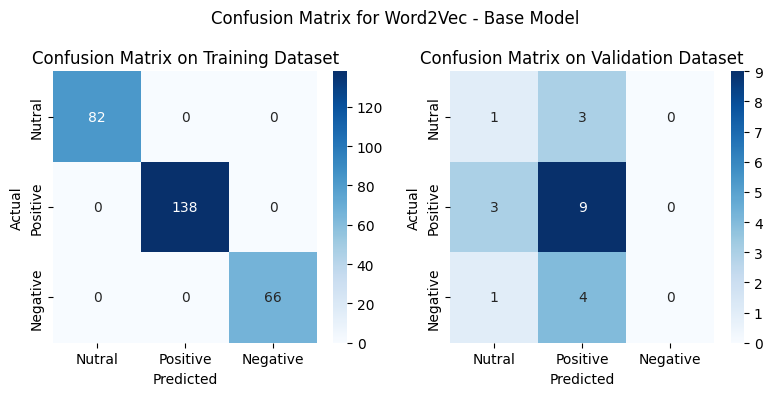

In [59]:
# Display the Confusion Matrix for Test Data
caption = "Confusion Matrix for Word2Vec - Base Model"

predictors = [X_train_wv, X_val_wv]       # Predictions for training and validation sets
targets = [y_train, y_val]                              # Actual targets for training and validation sets

# Plot the confusion matrix for the current model
plot_confusion_matrices_side_by_side(base_wv, predictors, targets, sentiment_label, caption, cm_model_titles, figsize = (8, 4))

In [60]:
Word2Vec_base_train_wv = model_performance_classification_sklearn(
    base_wv, X_train_wv,y_train, set = "Training", Title = "Word2Vec - Base Model"
)
Word2Vec_base_train_wv

,Set,Accuracy,Recall,Precision,F1 Score,Error (degree)
Model,,,,,,
Word2Vec - Base Model,Training,1.000,1.000,1.000,1.000,0.000


In [61]:
Word2Vec_base_val_wv = model_performance_classification_sklearn(
    base_wv, X_val_wv,y_val, set = "Validation", Title = "Word2Vec - Base Model"
)
Word2Vec_base_val_wv

,Set,Accuracy,Recall,Precision,F1 Score,Error (degree)
Model,,,,,,
Word2Vec - Base Model,Validation,0.476,0.476,0.360,0.410,0.571


**Ovservations**

**Training Dataset (Word2vec - Base Model)**:
 - **Accuracy, Recall, Precision, F1 Score**: All are 1.000 on the training dataset, which indicates that the model perfectly classifies all the training samples without any errors.
 - **Error (degree)**: The error is 0.000, confirming that the model predictions perfectly match the true labels on the training set.

**Conclusion**: The model is overfitting on the training dataset, as it achieves perfect scores. This suggests the model has learned the training data patterns too well and may not generalize effectively to new data.

---
**Validation Dataset (Word2vec - Base Model)**:
- **Accuracy, Recall, Precision, F1 Score**: The metrics are relatively low, indicating that the model performs poorly on the validation set. This is a clear sign of overfitting, as it fails to generalize to unseen data.
- **Error (degree)**: High, indicating a significant error rate in predictions for the validation set.

**Conclusion**: The poor performance on the validation dataset confirms that the model overfits the training data and struggles to generalize. The confusion matrix shows several misclassifications, particularly for the "Positive" and "Neutral" classes.

### Base Model - GloVe

In [62]:
base_gl = initialize_model(model_classifier, random_state = random_state)   # Initialize the base model
base_gl.fit(X_train_gl, y_train)                                            # Fit the base model on the training data

GradientBoostingClassifier(random_state=1)

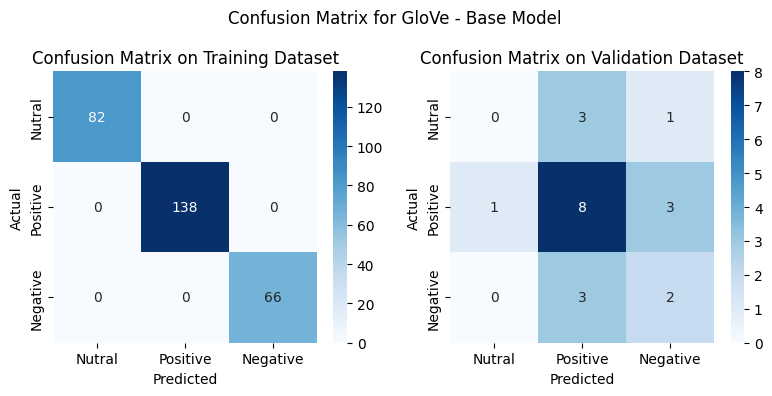

In [63]:
# Display the Confusion Matrix for Test Data
caption = "Confusion Matrix for GloVe - Base Model"

predictors = [X_train_gl, X_val_gl]       # Predictions for training and validation sets
targets = [y_train, y_val]                              # Actual targets for training and validation sets

# Plot the confusion matrix for the current model
plot_confusion_matrices_side_by_side(base_gl, predictors, targets, sentiment_label, caption, cm_model_titles, figsize = (8, 4))

In [64]:
GloVe_base_train_gl = model_performance_classification_sklearn(
    base_gl, X_train_gl,y_train, set = "Training", Title = "GloVe - Base Model"
)
GloVe_base_train_gl

,Set,Accuracy,Recall,Precision,F1 Score,Error (degree)
Model,,,,,,
GloVe - Base Model,Training,1.000,1.000,1.000,1.000,0.000


In [65]:
GloVe_base_val_gl = model_performance_classification_sklearn(
    base_gl, X_val_gl,y_val, set = "Validation", Title = "GloVe - Base Model"
)
GloVe_base_val_gl

,Set,Accuracy,Recall,Precision,F1 Score,Error (degree)
Model,,,,,,
GloVe - Base Model,Validation,0.476,0.476,0.406,0.438,0.571


**Observations**

**Training Dataset (GloVe - Base Model)**:
 - **Accuracy, Recall, Precision, F1 Score**: All metrics are 1.000, indicating that the GloVe-based model perfectly classifies all the training samples without any errors, similar to the Word2Vec-based model.
 - **Error (degree)**: 0.000, confirming that the model predictions perfectly match the true labels on the training set.

**Conclusion**: As with the Word2Vec model, the GloVe model also seems to be overfitting on the training dataset, achieving perfect scores.

---
**Validation Dataset (GloVe - Base Model)**:
 - **Accuracy, Recall, Precision, F1 Score**: All metrics show a moderate improvement compared to the Word2Vec model, indicating that the GloVe model performs slightly better on the validation set.
 - **Error (degree)**: Shows fewer errors than the Word2Vec model, suggesting some improvement in classification, particularly for the "Positive" and "Negative" classes.

**Conclusion**: While the GloVe model still struggles with generalization, it performs better than the Word2Vec model on the validation set, as reflected in the confusion matrix. Further adjustments may still be needed to enhance overall performance.

### Base Model - Sentence Transformer

In [66]:
base_st = initialize_model(model_classifier, random_state = random_state)   # Initialize the base model
base_st.fit(X_train_st, y_train)                                            # Fit the base model on the training data

GradientBoostingClassifier(random_state=1)

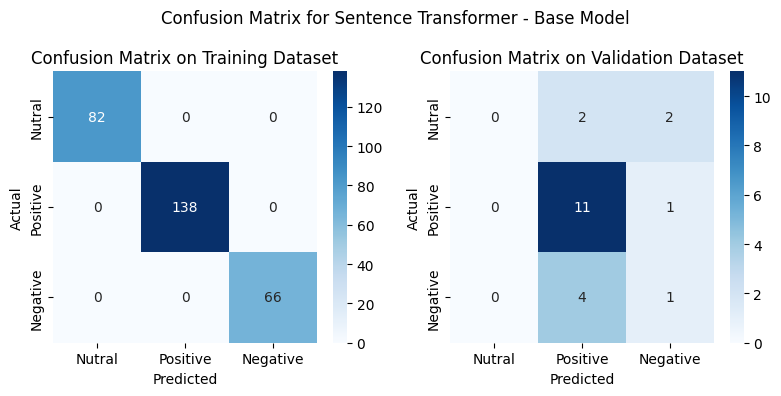

In [67]:
# Display the Confusion Matrix for Test Data
caption = "Confusion Matrix for Sentence Transformer - Base Model"

predictors = [X_train_st, X_val_st]       # Predictions for training and validation sets
targets = [y_train, y_val]                              # Actual targets for training and validation sets

# Plot the confusion matrix for the current model
plot_confusion_matrices_side_by_side(base_st, predictors, targets, sentiment_label, caption, cm_model_titles, figsize = (8, 4))

In [68]:
ST_base_train_st = model_performance_classification_sklearn(
    base_st, X_train_st,y_train, set = "Training", Title = "Sentence Transformer - Base Model"
)
ST_base_train_st

,Set,Accuracy,Recall,Precision,F1 Score,Error (degree)
Model,,,,,,
Sentence Transformer - Base Model,Training,1.000,1.000,1.000,1.000,0.000


In [69]:
ST_base_val_st = model_performance_classification_sklearn(
    base_st, X_val_st,y_val, set = "Validation", Title = "Sentence Transformer - Base Model"
)
ST_base_val_st

,Set,Accuracy,Recall,Precision,F1 Score,Error (degree)
Model,,,,,,
Sentence Transformer - Base Model,Validation,0.571,0.571,0.429,0.486,0.524


**Observations**

**Training Dataset (Sentence Transformer - Base Model)**:
 - Accuracy, Recall, Precision, F1 Score: All metrics are 1.000, indicating that the Sentence Transformer-based model perfectly classifies all the training samples without any errors.
 - Error (degree): 0.000, confirming that the model predictions perfectly match the true labels on the training set.

**Conclusion**: Similar to the previous models (Word2Vec and GloVe), the Sentence Transformer-based model appears to overfit on the training dataset, achieving perfect scores.

---
**Validation Dataset (Sentence Transformer - Base Model)**:
 - **Accuracy, Recall, Precision, F1 Score**: Shows a noticeable improvement compared to both the Word2Vec and GloVe models, with higher performance across all metrics.
 - **Error (degree)**: Lower than both Word2Vec and GloVe models, indicating fewer misclassifications.

**Conclusion**: The Sentence Transformer-based model demonstrates significant improvement on the validation set compared to the other models, particularly in terms of accuracy and recall. The confusion matrix shows fewer misclassifications, especially in the "Positive" and "Negative" classes.

### Tuned Model - Word2Vec

In [70]:
from sklearn.model_selection import GridSearchCV

start = time.time()

tuned_wv = initialize_model(model_classifier, random_state = random_state)   # Initialize the tuned model

# Perform the GridSearch with cross-validation (cv=5)
# to find the best hyperparameters using the specified scoring metric (f1_weighted)
grid_obj_wv = GridSearchCV(tuned_wv, param_grid, scoring='f1_weighted',cv=5,n_jobs=-1)

grid_obj_wv = grid_obj_wv.fit(X_train_wv, y_train)                           # Fit the tuned model on the training data

end = time.time()
print("Time taken for GridSearch",(end-start))

# Set the clf to the best combination of parameters
tuned_wv = grid_obj_wv.best_estimator_

Time taken for GridSearch 2123.2397916316986


In [71]:
# Output the best parameters
print("Best parameters found for Word2Vec Tuned Model:", grid_obj_wv.best_params_)

Best parameters found for Word2Vec Tuned Model: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 0.2, 'min_samples_split': 9}


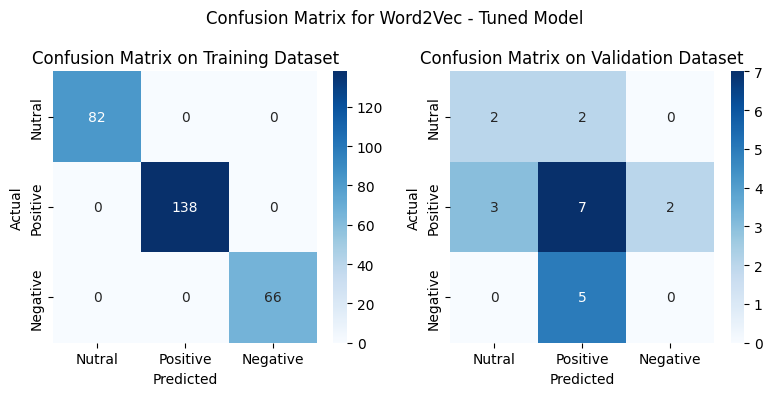

In [72]:
# Display the Confusion Matrix for Test Data
caption = "Confusion Matrix for Word2Vec - Tuned Model"

predictors = [X_train_wv, X_val_wv]       # Predictions for training and validation sets
targets = [y_train, y_val]                              # Actual targets for training and validation sets

# Plot the confusion matrix for the current model
plot_confusion_matrices_side_by_side(tuned_wv, predictors, targets, sentiment_label, caption, cm_model_titles, figsize = (8, 4))

In [73]:
Word2Vec_tuned_train_wv = model_performance_classification_sklearn(
    tuned_wv, X_train_wv,y_train, set = "Training", Title = "Word2Vec - Tuned Model"
)
Word2Vec_tuned_train_wv

,Set,Accuracy,Recall,Precision,F1 Score,Error (degree)
Model,,,,,,
Word2Vec - Tuned Model,Training,1.000,1.000,1.000,1.000,0.000


In [74]:
Word2Vec_tuned_val_wv = model_performance_classification_sklearn(
    tuned_wv, X_val_wv,y_val, set = "Validation", Title = "Word2Vec - Tuned Model"
)
Word2Vec_tuned_val_wv

,Set,Accuracy,Recall,Precision,F1 Score,Error (degree)
Model,,,,,,
Word2Vec - Tuned Model,Validation,0.429,0.429,0.362,0.392,0.571


**Observations**

**Training Dataset (Word2Vec - Tuned Model)**:

 - The performance is the same as the base model, with perfect scores across all metrics, indicating overfitting.
---

**Validation Dataset (Word2Vec - Tuned Model)**:
- **Accuracy and Recall**: There is a slight improvement compared to the base model, indicating a minor enhancement in correctly classifying the validation examples.
- **Precision**: Shows a small increase, suggesting that the tuned model makes slightly more accurate positive predictions.
- **F1 Score**: Has improved, reflecting a marginally better balance between precision and recall.
- **Error (degree)**: Decreased slightly, indicating a minor reduction in the misclassification rate.

**Conclusion**:The tuned model shows small improvements in accuracy, precision, and F1 score on the validation set, suggesting that tuning had some positive impact. However, overfitting persists, as seen from the perfect scores on the training set. The confusion matrix indicates ongoing misclassification issues, particularly in the "Positive" and "Neutral" classes. Further tuning, additional data, or alternative strategies may be needed to enhance the model's generalization.

### Tuned Model - GloVe

In [75]:
start = time.time()

tuned_gl = initialize_model(model_classifier, random_state = random_state)   # Initialize the tuned model

# Perform the GridSearch with cross-validation (cv=5)
# to find the best hyperparameters using the specified scoring metric (f1_weighted)
grid_obj_gl = GridSearchCV(tuned_gl, param_grid, scoring='f1_weighted',cv=5,n_jobs=-1)

grid_obj_gl = grid_obj_gl.fit(X_train_gl, y_train)     # Fit the tuned model on the training data

end = time.time()
print("Time taken for GridSearch",(end-start))

# Set the clf to the best combination of parameters
tuned_gl = grid_obj_gl.best_estimator_

Time taken for GridSearch 872.1829850673676


In [76]:
# Output the best parameters
print("Best parameters found for GloVe Tuned Model:", grid_obj_gl.best_params_)

Best parameters found for GloVe Tuned Model: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 9}


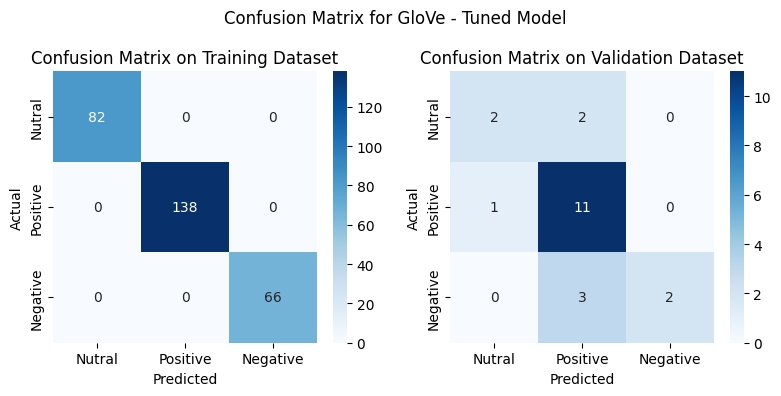

In [77]:
# Display the Confusion Matrix for Test Data
caption = "Confusion Matrix for GloVe - Tuned Model"

predictors = [X_train_gl, X_val_gl]       # Predictions for training and validation sets
targets = [y_train, y_val]                              # Actual targets for training and validation sets

# Plot the confusion matrix for the current model
plot_confusion_matrices_side_by_side(tuned_gl, predictors, targets, sentiment_label, caption, cm_model_titles, figsize = (8, 4))

In [78]:
GloVe_tuned_train_gl = model_performance_classification_sklearn(
    tuned_gl, X_train_gl,y_train, set = "Training", Title = "GloVe - Tuned Model"
)
GloVe_tuned_train_gl

,Set,Accuracy,Recall,Precision,F1 Score,Error (degree)
Model,,,,,,
GloVe - Tuned Model,Training,1.000,1.000,1.000,1.000,0.000


In [79]:
GloVe_tuned_val_gl = model_performance_classification_sklearn(
    tuned_gl, X_val_gl,y_val, set = "Validation", Title = "GloVe - Tuned Model"
)
GloVe_tuned_val_gl

,Set,Accuracy,Recall,Precision,F1 Score,Error (degree)
Model,,,,,,
GloVe - Tuned Model,Validation,0.714,0.714,0.758,0.694,0.286


**Observations**

**Training Dataset (GloVe - Tuned Model)**:
- **Metrics (Accuracy, Recall, Precision, F1 Score)**: All are 1.000, indicating overfitting on the training dataset, similar to the base model.

**Validation Dataset (GloVe - Tuned Model)**:
 - **Accuracy**: Shows a significant improvement compared to the base model.
 - **Recall**: Increased, indicating better identification of true positives.
 - **Precision**: Improved, suggesting more accurate positive predictions.
 - **F1 Score**: Indicates a better balance between precision and recall.
 - **Error**: Decreased, reflecting fewer misclassifications.

**Conclusion**: The tuned GloVe model demonstrates noticeable improvements on the validation set, with higher accuracy and reduced error. However, overfitting on the training set remains a concern, suggesting that further adjustments may be necessary to enhance the model's generalization capabilities.

### Tuned Model - Sentence Transformer

In [80]:
start = time.time()

tuned_st = initialize_model(model_classifier, random_state = random_state)   # Initialize the tuned model

# Perform the GridSearch with cross-validation (cv=5)
# to find the best hyperparameters using the specified scoring metric (f1_weighted)
grid_obj_st = GridSearchCV(tuned_st, param_grid, scoring='f1_weighted',cv=5,n_jobs=-1)

grid_obj_st = grid_obj_st.fit(X_train_st, y_train)                                 # Fit the tuned model on the training data

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st = grid_obj_st.best_estimator_

Time taken  1961.6640100479126


In [81]:
# Output the best parameters
print("Best parameters found for Sentence Transformer Tuned Model:", grid_obj_st.best_params_)

Best parameters found for Sentence Transformer Tuned Model: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 9}


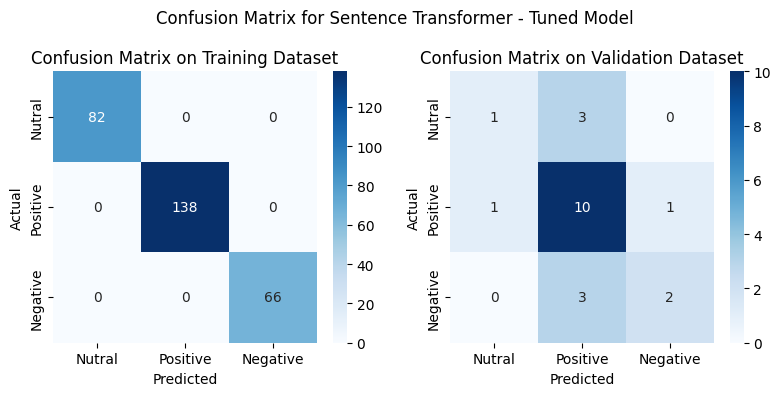

In [82]:
# Display the Confusion Matrix for Test Data
caption = "Confusion Matrix for Sentence Transformer - Tuned Model"

predictors = [X_train_st, X_val_st]       # Predictions for training and validation sets
targets = [y_train, y_val]                              # Actual targets for training and validation sets

# Plot the confusion matrix for the current model
plot_confusion_matrices_side_by_side(tuned_st, predictors, targets, sentiment_label, caption, cm_model_titles, figsize = (8, 4))

In [83]:
ST_tuned_train_st = model_performance_classification_sklearn(
    tuned_st, X_train_st,y_train, set = "Training", Title = "Sentence Transformer - Tuned Model"
)
ST_tuned_train_st

,Set,Accuracy,Recall,Precision,F1 Score,Error (degree)
Model,,,,,,
Sentence Transformer - Tuned Model,Training,1.000,1.000,1.000,1.000,0.000


In [84]:
ST_tuned_val_st = model_performance_classification_sklearn(
    tuned_st, X_val_st,y_val, set = "Validation", Title = "Sentence Transformer - Tuned Model"
)
ST_tuned_val_st

,Set,Accuracy,Recall,Precision,F1 Score,Error (degree)
Model,,,,,,
Sentence Transformer - Tuned Model,Validation,0.619,0.619,0.611,0.591,0.381


**Observations**

**Training Dataset (Sentence Transformer - Tuned Model)**:
- **Accuracy, Recall, Precision, F1 Score**: All metrics remain perfect, similar to the base model, indicating persistent overfitting on the training data.
- **Error (degree)**: Zero, confirming that the model continues to perfectly classify the training samples.

---
**Validation Dataset (Sentence Transformer - Tuned Model)**:
- **Accuracy and Recall**: Both have increased compared to the base model, indicating an improvement in correctly classifying the validation data.
- **Precision**: Shows a noticeable increase, suggesting the tuned model makes more accurate positive predictions.
- **F1 Score**: Has improved, reflecting a better balance between precision and recall.
- **Error (degree)**: Lower than the base model, indicating a reduction in misclassification rates.

**Conclusion**:The tuned Sentence Transformer model shows improved performance on the validation set compared to the base model, with higher accuracy, precision, recall, and a reduced error rate. Despite these improvements, the model still shows signs of overfitting on the training dataset. The confusion matrix indicates fewer misclassifications, especially for the "Positive" class, showing that tuning has enhanced the model's generalization to some extent.

### Model Performance Summary and Final Model Selection

In [85]:
# Combine all performance data into one dataset
combined_df = pd.concat([Word2Vec_base_train_wv,
                        Word2Vec_base_val_wv,
                        GloVe_base_train_gl,
                        GloVe_base_val_gl,
                        ST_base_train_st,
                        ST_base_val_st,
                        Word2Vec_tuned_train_wv,
                        Word2Vec_tuned_val_wv,
                        GloVe_tuned_train_gl,
                        GloVe_tuned_val_gl,
                        ST_tuned_train_st,
                        ST_tuned_val_st])

# Create a Pivot table of the performance results
performance_pivot = combined_df.pivot_table(index="Model", columns="Set" )

from IPython.display import HTML  # Import

# Define the HTML text in a string with larger font size
html_text = """
<p style='font-size:18px;'><strong>Compare the performance of Training vs. Validation sets for all Base and Tuned Models</span>:</strong></p><br>
"""
display(HTML(html_text))    # Display the HTML text

# Display the pivot table
performance_pivot

Accuracy            Error (degree)  \
Set                                Training Validation       Training   
Model                                                                   
GloVe - Base Model                    1.000      0.476          0.000   
GloVe - Tuned Model                   1.000      0.714          0.000   
Sentence Transformer - Base Model     1.000      0.571          0.000   
Sentence Transformer - Tuned Model    1.000      0.619          0.000   
Word2Vec - Base Model                 1.000      0.476          0.000   
Word2Vec - Tuned Model                1.000      0.429          0.000   

                                              F1 Score            Precision  \
Set                                Validation Training Validation  Training   
Model                                                                         
GloVe - Base Model                      0.571    1.000      0.438     1.000   
GloVe - Tuned Model                     0.286    1.000      0.694     1.000   
Sentence Transformer - Base Model       0.524    1.000      0.486     1.000   
Sentence Transformer - Tuned Model      0.381    1.000      0.591     1.000   
Word2Vec - Base Model                   0.571    1.000      0.410     1.000   
Word2Vec - Tuned Model                  0.571    1.000      0.392     1.000   

                                                Recall             
Set                                Validation Training Validation  
Model                                                              
GloVe - Base Model                      0.406    1.000      0.476  
GloVe - Tuned Model                     0.758    1.000      0.714  
Sentence Transformer - Base Model       0.429    1.000      0.571  
Sentence Transformer - Tuned Model      0.611    1.000      0.619  
Word2Vec - Base Model                   0.360    1.000      0.476  
Word2Vec - Tuned Model                  0.362    1.000      0.429

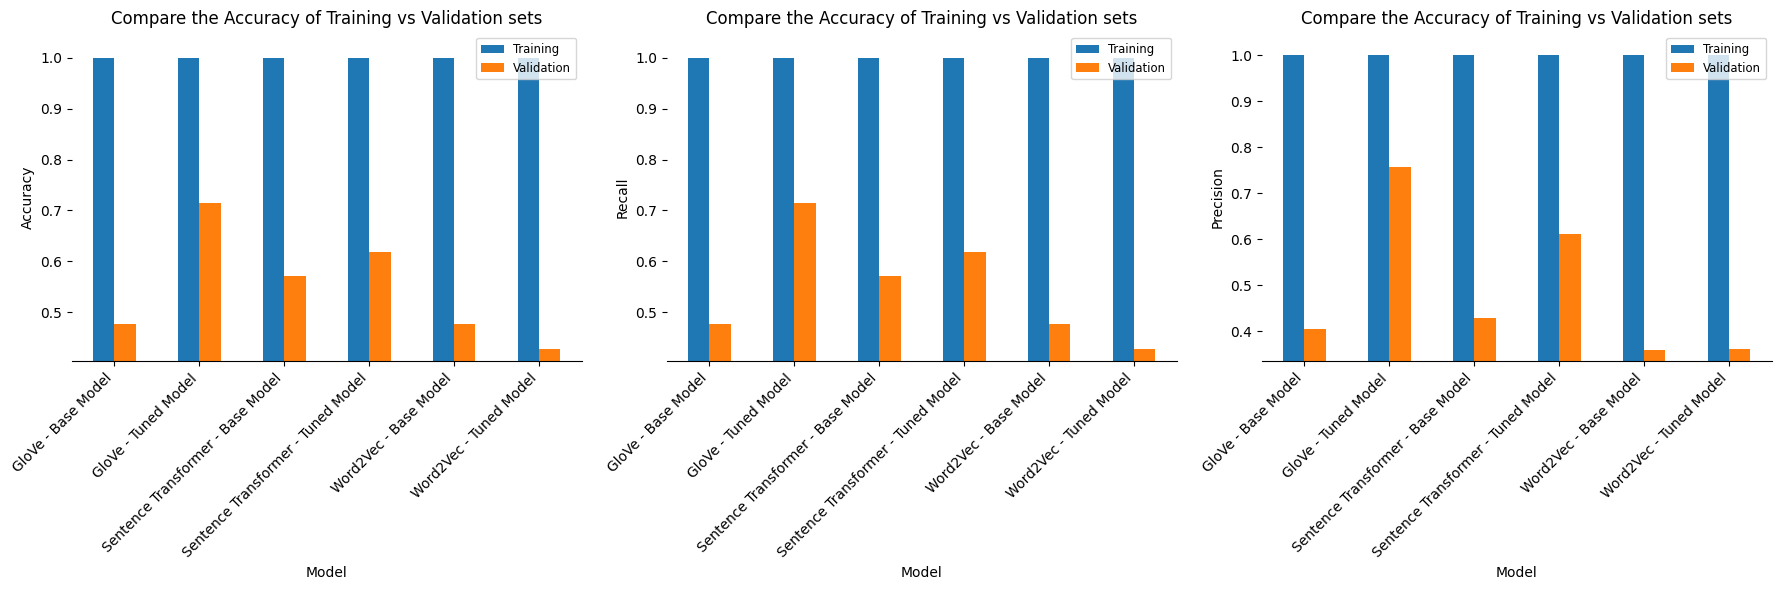

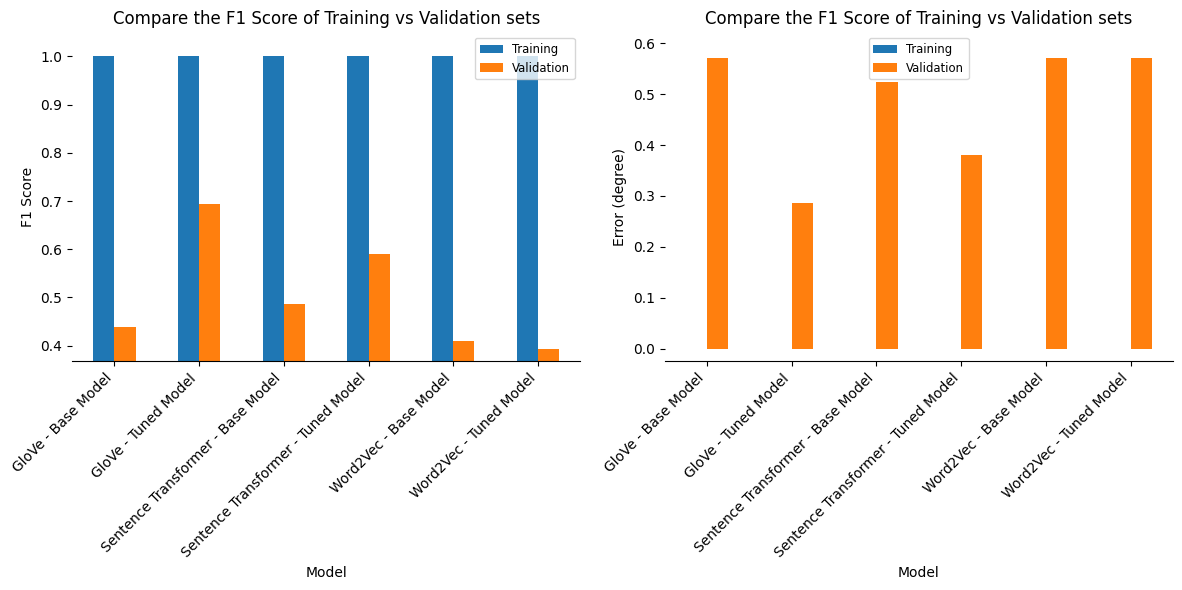

In [86]:
# Visualize the performance of Training and Validation Set for Models
Visualize_Perf_compariason( performance_pivot,   # Performance Data
                            ['Accuracy', 'Recall', 'Precision'],     # array of Performance parameters
                            degree = 45,
                            )
# Visualize the performance of Training and Validation Set for Models
Visualize_Perf_compariason( performance_pivot,   # Performance Data
                            ['F1 Score', 'Error (degree)'],     # array of Performance parameters
                            degree = 45,
                            )

The best model selected is the **GloVe - Tuned Model**, and here's the reasoning behind this selection based on the provided performance metrics:

1. **Validation Accuracy**:The GloVe - Tuned Model has a validation accuracy of 0.714, which is the highest among all models. This indicates that it correctly classifies a larger proportion of the validation data compared to the others.
5. **Recall**:The validation recall is 0.714, which is the best among all models. This means the GloVe - Tuned Model is more effective in correctly identifying all the true positive cases in the validation set.
4. **Precision**:The validation precision of 0.758 for the GloVe - Tuned Model is the highest. This indicates that when the model predicts a positive class, it is correct more often than any of the other models.
3. **F1 Score**:The validation F1 score for the GloVe - Tuned Model is 0.694, the highest among the models. The F1 score balances precision and recall, making it a key metric, especially in imbalanced datasets. The higher F1 score suggests that the model has an excellent balance between correctly identifying true positives and minimizing false positives.
2. **Error (degree)**:The error on the validation set for the GloVe - Tuned Model is 0.286, which is the lowest among all models. A lower error rate indicates fewer misclassifications, suggesting better generalization to unseen data.
**Conclusion**:
The GloVe - Tuned Model outperforms the other models across multiple critical metrics, including accuracy, error rate, F1 score, precision, and recall on the validation set. These factors indicate that it not only has a good fit on the training data but also generalizes well to unseen data, making it the best choice for final deployment.

### Model Performance Check on Test Data

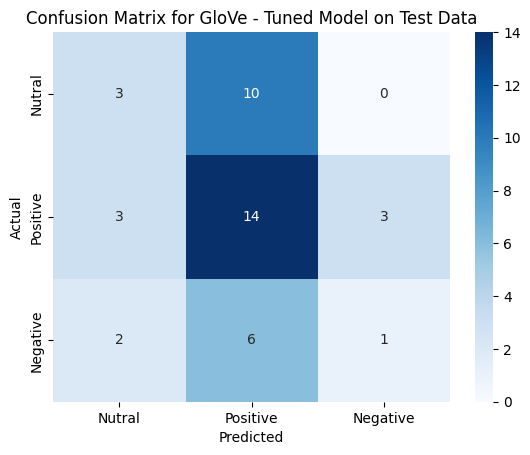

In [87]:
# Display the Confusion Matrix for Test Data
confusion_matrix_sklearn(tuned_gl, X_test_gl, y_test, sentiment_label, title = "Confusion Matrix for GloVe - Tuned Model on Test Data").show()

In [88]:
#Calculating different metrics on training data
GloVe_base_test_gl = model_performance_classification_sklearn(
    tuned_gl, X_test_gl,y_test, set = "Test", Title = "GloVe - Tuned Model"
)
GloVe_base_test_gl

,Set,Accuracy,Recall,Precision,F1 Score,Error (degree)
Model,,,,,,
GloVe - Tuned Model,Test,0.429,0.429,0.392,0.388,0.619


**Observations**: On the test data, the GloVe - Tuned Model shows a decline in performance compared to the validation set:
 - **Accuracy**: Drops from the validation score to 0.429 on the test set, indicating a decrease in the model's overall correctness.
 - **Recall**: Decreases to 0.429 on the test set, suggesting reduced effectiveness in identifying true positives.
 - **Precision**: Falls to 0.392, showing a higher rate of false positives compared to the validation set.
 - **F1 Score**: Declines to 0.388, pointing to a weaker balance between precision and recall on the test data.
 - **Error (degree)**: Increases to 0.619, indicating a rise in misclassifications.

**Conclusion**: The confusion matrix reveals the model struggles particularly with distinguishing "Neutral" from "Positive" classes, suggesting further tuning or alternative strategies may be needed for better generalization on test data.

## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.77

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.77

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 MB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.4 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.2.77-cp310-cp310-linux_x86_64.whl size=132172294 sha256=db7b4499494d67585dea95ef7841617bf9f939f13188c5b127b0b8d29806060e
  Stored in directory: /root/.cache/pip/wheels/ed/55/a1/6d6c2ef6fed3ef054b4170d8bcd05a09e6dc971db7fad955ff
Successfully built llama-cpp-python


In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loding the dataset

In [ ]:
# Read the Data from excel into a dataset
folder = '/content/drive/MyDrive/AI_ML/Projects/Natural Language Processing - NLP/' # Path of the data files
stock_news_file = 'stock_news.csv'                                                  # Name of the Stock news file

stock_news = pd.read_csv(folder + stock_news_file)                                  # Reading the Stock news file
stock = stock_news.copy()                                                           # Copying the data to another variable to avoid any changes to original data

#### Loading the model

In [ ]:
from huggingface_hub import hf_hub_download

model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

model_path = hf_hub_download(
    repo_id=model_name_or_path,  # The repo_id should be the model name or path
    filename=model_basename      # The filename should be the specific file you want to download
)

mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path, # Path to the model
    n_gpu_layers=100, #Number of layers transferred to GPU
    n_ctx=4500, #Context window
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

In [ ]:
# uncomment and run the following code in case GPU is not being used

# llm = Llama(
#     model_path=model_path,
#     n_ctx=4500, # Context window
#     n_cores=-2 # Number of CPU cores to use
# )

#### Aggregating the data weekly

In [ ]:
stock["Date"] = pd.to_datetime(stock['Date'])  # Convert the 'Date' column to datetime format

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = stock.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
# Aggregate the grouped data on a weekly basis
# concatenate 'content' values into a single string separated by ' || '.
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [ ]:
# creating a copy of the data
weekly_stock = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:
# Defining the response function
def response_mistral_1(prompt, news,
                       max_tokens = 512,
                       temperature = 1,
                       top_p = 1,
                       top_k = 100,
                       echo = False):
    model_output = llm(
        f"""
        [INST]
        {prompt}
        News Articles: {news}
        [/INST]
        """,
        max_tokens = max_tokens,    # Setting a limit on the number of tokens to ensure concise responses
        temperature = temperature,  # Setting temperature for a balance between creativity and coherence
        top_p = top_p,              # Setting top_p for nucleus sampling to control randomness
        top_k = top_k,              # Setting top_k to limit the sampling to top 50 predictions
        echo = echo,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

##### Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

In [ ]:
news = weekly_stock.loc[0, 'News']  # Checking the model output on a sample

print(len(news.split(' ')))         # Prints the number of words in the sample news
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

In [ ]:
# Defining the prompt for this task
prompt = """
You are an expert financial analyst specializing in stock market analysis and news content summarization.

Task: Summarize the provided weekly news by identifying the top three positive and top three negative events that are most likely to impact stock prices.

Instructions:
1. Review the provided news content carefully.
2. Identify and list events that could significantly influence stock prices, such as market trends, economic indicators, or corporate developments.
3. Categorize these events into 'Positive' or 'Negative' based on their potential impact on the market.
4. Select the top three most impactful 'Positive Events' and the top three most impactful 'Negative Events.'
5. Each event should be concise, highlighting the main subject, action, and expected market impact.

Output Format: Return the output in JSON format with two keys: "Positive Events" and "Negative Events," each containing a list of three events as strings.

Example Output:
{
    "Positive Events": [
        "Company A reported better-than-expected quarterly earnings.",
        "The central bank announced a reduction in interest rates.",
        "Tech Company X launched a new innovative product."
    ],
    "Negative Events": [
        "Country Y imposed new trade tariffs.",
        "Company B faced a major data breach.",
        "Oil prices dropped due to economic concerns."
    ]
}
"""

In [ ]:
%%time
summary = response_mistral_1(prompt, news,
                             max_tokens = 512,
                             temperature = 0.7,
                             top_p = 0.8,
                             top_k = 50,
                             echo = False)
print(summary)


llama_print_timings:        load time =     785.98 ms
llama_print_timings:      sample time =     135.72 ms /   213 runs   (    0.64 ms per token,  1569.43 tokens per second)
llama_print_timings: prompt eval time =    4754.67 ms /  4075 tokens (    1.17 ms per token,   857.05 tokens per second)
llama_print_timings:        eval time =    8226.78 ms /   212 runs   (   38.81 ms per token,    25.77 tokens per second)
llama_print_timings:       total time =   13386.67 ms /  4287 tokens


 {
             "Positive Events": [
                 "Roku Inc announced plans to offer premium video channels on a subscription basis through its free streaming service, The Roku Channel.",
                 "FDIC Chair Jelena McWilliams expressed no concern over market volatility affecting the U.S banking system.",
                 "Chinese central bank announced a fifth reduction in the required reserve ratio (RRR) for banks, freeing up approximately 116.5 billion yuan for new lending."
             ],
             "Negative Events": [
                 "Apple cut its quarterly revenue forecast for the first time in over 15 years due to weak iPhone sales in China.",
                 "Goldman analyst Rod Hall lowered his price target for Apple from $182 to $140, citing potential risks to the tech giant's 2019 numbers.",
                 "Delta Air Lines lowered its fourth-quarter revenue growth forecast."
             ]
         }
CPU times: user 12.2 s, sys: 856 ms, total: 13 s
Wall 

##### Checking the model output on the weekly data

In [ ]:
from tqdm import tqdm
tqdm.pandas()

%time
weekly_stock['Key Events'] = weekly_stock['News'].progress_apply(lambda x: response_mistral_1(prompt, x))
weekly_stock["Key Events"].head()  # Print the first 5 rows of the 'Key Events' column

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


  0%|          | 0/18 [00:00<?, ?it/s]Llama.generate: prefix-match hit

llama_print_timings:        load time =     785.98 ms
llama_print_timings:      sample time =     143.69 ms /   223 runs   (    0.64 ms per token,  1551.93 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     0 tokens (    -nan ms per token,     -nan tokens per second)
llama_print_timings:        eval time =    8676.84 ms /   223 runs   (   38.91 ms per token,    25.70 tokens per second)
llama_print_timings:       total time =    9067.31 ms /   223 tokens
 11%|█         | 2/18 [00:09<01:12,  4.55s/it]Llama.generate: prefix-match hit

llama_print_timings:        load time =     785.98 ms
llama_print_timings:      sample time =     198.73 ms /   212 runs   (    0.94 ms per token,  1066.79 tokens per second)
llama_print_timings: prompt eval time =    2461.17 ms /  2234 tokens (    1.10 ms per token,   907.70 tokens per second)
llama_print_timings:        eval time =    8614.61 ms /   211 runs

,Key Events
0,"{\n ""Positive Events"": [\n ..."
1,"{\n ""Positive Events"": [\n ..."
2,"{\n ""Positive Events"": [\n ..."
3,"{\n ""Positive Events"": [\n ..."
4,"{\n ""Positive Events"": [\n ..."


##### Formatting the model output

In [ ]:
weekly_stock['model_response_parsed'] = weekly_stock['Key Events'].apply(extract_json_data)
weekly_stock.head()

,Date,News,Key Events,model_response_parsed
0,2019-01-06,The tech sector experienced a significant dec...,"{\n ""Positive Events"": [\n ...",{'Positive Events': ['Roku Inc announced plans...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{\n ""Positive Events"": [\n ...",{'Positive Events': ['Sprint and Samsung plan ...
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{\n ""Positive Events"": [\n ...",{'Positive Events': ['Netflix announced a pric...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""Positive Events"": [\n ...",{'Positive Events': ['IBM reported better-than...
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"{\n ""Positive Events"": [\n ...",{'Positive Events': ['Apple reported stronger-...


In [ ]:
model_response_parsed = pd.json_normalize(weekly_stock['model_response_parsed'])
model_response_parsed.head()

,Positive Events,Negative Events
0,[Roku Inc announced plans to offer premium vid...,[Apple cut its quarterly revenue forecast for ...
1,[Sprint and Samsung plan to release 5G smartph...,[Geely forecasted flat sales for 2019 due to e...
2,[Netflix announced a price increase for U.S su...,[China's unexpected drops in exports and impor...
3,[IBM reported better-than-expected earnings an...,[White House rejected a scheduled meeting with...
4,[Apple reported stronger-than-expected earning...,[Caterpillar Inc reported lower-than-expected ...


In [ ]:
final_output = pd.concat([weekly_stock.reset_index(drop=True),model_response_parsed],axis=1)
final_output.drop(['Key Events','model_response_parsed'], axis=1, inplace=True)
final_output.columns = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']

final_output.head()

,Week End Date,News,Week Positive Events,Week Negative Events
0,2019-01-06,The tech sector experienced a significant dec...,[Roku Inc announced plans to offer premium vid...,[Apple cut its quarterly revenue forecast for ...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,[Sprint and Samsung plan to release 5G smartph...,[Geely forecasted flat sales for 2019 due to e...
2,2019-01-20,The U.S. stock market declined on Monday as c...,[Netflix announced a price increase for U.S su...,[China's unexpected drops in exports and impor...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...",[IBM reported better-than-expected earnings an...,[White House rejected a scheduled meeting with...
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,[Apple reported stronger-than-expected earning...,[Caterpillar Inc reported lower-than-expected ...


##### **Observations**


1. **Key Insights**: The weekly summarization of stock-related news has provided several key insights into how various news events impact stock sentiment and potential market movements. The analysis reveals recurring themes within both positive and negative events that can serve as indicators for predicting changes in stock prices.
2. **Positive Events Correlation**: Positive events, such as "better-than-expected earnings," "new product launches," and "regulatory approvals," appear to correlate with a potential rise in stock prices and an increase in trading volumes.
3. **Negative Events Correlation**: Conversely, negative events like "revenue forecast cuts," "market downturns," and "trade restrictions" are linked to market volatility and possible declines in stock performance.
4. **Preliminary Trend Analysis**: A preliminary analysis suggests a possible trend wherein weeks dominated by positive events often correspond with upward movements in stock prices. Conversely, weeks characterized by negative news, particularly those involving significant market or economic disruptions, may precede periods of stock price declines.
5. **Foundational Understanding**: These observations provide a foundational understanding of the types of news events that most significantly impact stock sentiment. This information can be leveraged for further quantitative analysis to enhance stock price prediction models, thereby informing the startup's investment strategies more effectively. Future work will include correlating these weekly sentiments with stock price and trade volume changes to refine predictive accuracy.

## **Conclusions and Recommendations**

-




1. **Impact of Positive and Negative News on Stock Prices
Insight**: The weekly sentiment analysis reveals that certain positive events, such as "better-than-expected earnings" or "new product launches," often correlate with a potential rise in stock prices. Conversely, negative news, such as "revenue forecast cuts" or "market downturns," align with potential declines in stock performance and increased market volatility.
  
  **Recommendation**: Monitor key events such as earnings reports, product announcements, and regulatory changes closely. Develop an alert system for when similar news is released to make timely investment decisions.

2. **Trend Analysis for Better Forecasting Insight**: The initial observation indicates that weeks dominated by positive sentiment are likely followed by periods of upward stock price movements. Conversely, weeks characterized by negative sentiment precede potential declines.

  **Recommendation**: Incorporate weekly sentiment trends into stock price prediction models to enhance forecasting accuracy. Use this data-driven approach to identify high-risk and high-opportunity periods, optimizing the timing of buy/sell decisions.

3. **Focus on High-Impact News Categories Insight**: Recurring themes such as market trends, earnings reports, and technological innovations show significant influence on market sentiment and stock price movements.

  **Recommendation**: Prioritize news categories that historically have a significant impact on stock prices in the sentiment analysis model. This will enable the business to filter out less relevant news and focus on actionable information, leading to more informed investment strategies.

4. **Automated Sentiment Monitoring System Insight**: Given the volume of daily news articles, manually tracking sentiment is impractical. Automated weekly summarization and categorization provide a concise view of market sentiment trends.
  
  **Recommendation**: Implement an automated sentiment analysis system that aggregates news weekly and highlights key positive and negative events. This system will empower analysts to quickly assess market conditions and adjust investment strategies based on real-time market sentiment, improving decision-making and client outcomes.

<font size=6 color='blue'>Power Ahead</font>
___